### **Estrategia con Etiquetas `-1`**

### **Introducción**
En el análisis inicial de clustering utilizando DBSCAN o HDBSCAN, se observaron puntos etiquetados como `-1`, los cuales representan **outliers** o datos que no pudieron ser asignados a ningún cluster. Aunque estos puntos se consideran ruido dentro del modelo original, contienen información valiosa que puede ser aprovechada mediante un análisis adicional.

Para estos datos etiquetados como `-1`, se plantea una estrategia de clustering secundaria, que combinará características extraídas de imágenes, texto y otros atributos relevantes (como precios, marcas y códigos GTIN) con el objetivo de asignarlos a nuevos clusters de manera más eficiente.

---

### **Estrategia Propuesta**

#### **1. Extracción de Características**
Para analizar los puntos `-1` y asignarlos a nuevos clusters, se utilizarán los siguientes tipos de características:
- **Imágenes**: Usaremos el modelo **CLIP** para generar embeddings de características visuales desde las URL de las imágenes.
- **Texto**: También utilizaremos **CLIP** para extraer embeddings textuales basados en los títulos de los productos, además de incluir los embeddings previamente generados en el archivo Pickle.
- **Atributos Adicionales**:
  - Precios: Serán normalizados utilizando `StandardScaler`.
  - Marcas: Serán codificadas en formato **One-Hot Encoding**.
  - GTIN: Si está disponible, será codificado para mejorar la separación.

---

#### **2. Clustering Secundario con DBSCAN**
Una vez procesadas las características, se realizará un segundo análisis de clustering sobre los puntos `-1` utilizando **DBSCAN**:
- **Ventajas de DBSCAN**:
  - Manejo eficiente de densidades variables.
  - Detección de clusters compactos en datos complejos.
  - Reducción de la complejidad en comparación con HDBSCAN.
- **Parámetros a Configurar**:
  - `eps`: Distancia máxima entre puntos para formar un cluster.
  - `min_samples`: Número mínimo de puntos necesarios para formar un cluster.

---

#### **3. Integración de Resultados**
- Los puntos etiquetados como `-1` en el clustering original serán reclasificados en nuevos clusters.
- Los clusters existentes y los nuevos se integrarán en un único conjunto, con etiquetas actualizadas.

---

#### **4. Visualización y Análisis**
Para evaluar los resultados, se implementarán:
- Visualizaciones en 2D utilizando **UMAP** para mostrar la distribución de los nuevos clusters.
- Métricas de evaluación (como **Silhouette Score** y **Davies-Bouldin Score**) para validar la calidad del nuevo clustering.

---

### **Beneficios de la Estrategia**
1. **Mejora la Cobertura**: Los puntos originalmente marcados como `-1` serán aprovechados, aumentando la cantidad de datos útiles.
2. **Integración de Múltiples Fuentes de Información**: La combinación de características visuales, textuales y numéricas permitirá una segmentación más precisa.
3. **Mayor Flexibilidad**: Usar DBSCAN en esta etapa facilitará el ajuste de parámetros y el análisis de los resultados.


In [157]:
import pandas as pd
df = pd.read_csv('../data/clustering_results/products_title_clustering_20250205_171807.csv')
df_csv = df[df["cluster"]==-1]
df_csv

id                                              title  \
0    MCO1312345739                     Cerca 75km - Ganado - Impulsor   
2     MCO601595467  Limpiador  Electrónico -removedor De Polvo - A...   
3     MCO611865640  Planta Cerca Eléctrica Solar 100km, Incluye Pa...   
12    MCO658922476  Batería Lipo 3.7v 1s 1000mah Nueva Drone Proye...   
16    MCO826585974  Punta Logica Automotriz 6v 12v 24v Probador De...   
..             ...                                                ...   
995   MCO542097832  Gripple Plus Medium Pack De 20 | Alambre Joine...   
996   MCO542414089  Presurizador Bomba Automatico Soluciona La Baj...   
997   MCO542469534  8,5 X 11 Sostenedor De La Muestra De Acrílico ...   
998   MCO542656528  Fantasia Walt Disney Video Laserdisc- Musical ...   
999   MCO542909729  Medidor De Alto Voltaje Para Cerca Eléctrica 1...   

                                             thumbnail   price  \
0    http://http2.mlstatic.com/D_926804-MCO70350738...  165000   
2    http://http2.mlstatic.com/D_995727-MCO73203873...   21500   
3    http://http2.mlstatic.com/D_844953-MCO45203598...  690000   
12   http://http2.mlstatic.com/D_877411-MCO47231784...   36550   
16   http://http2.mlstatic.com/D_681123-MCO48067623...   35000   
..                                                 ...     ...   
995  http://http2.mlstatic.com/D_926412-MCO44224848...  274000   
996  http://http2.mlstatic.com/D_914137-MCO45760245...  379999   
997  http://http2.mlstatic.com/D_864629-MCO40475967...  210000   
998  http://http2.mlstatic.com/D_841362-MCO28010690...   55000   
999  http://http2.mlstatic.com/D_636667-MCO69785957...   64000   

                     brand                        gtin              brand_std  \
0       CERCAS DEL ORIENTE   000223213232,000055393829     cercas del oriente   
2              ABRO DUSTER                         NaN            abro duster   
3    UNIVERSAL ELECTRÓNICS                         NaN  universal electronics   
12                     NaN                         NaN                    NaN   
16                   Tonic                         NaN                  tonic   
..                     ...                         ...                    ...   
995      Yardware etcetera  672205002204,0672205002204      yardware etcetera   
996                  Dmgas                         NaN                  dmgas   
997               Arraview  605930132700,0605930132700               arraview   
998                    NaN                         NaN                    NaN   
999                    NaN                         NaN                    NaN   

                              gtin_std  \
0     ['000055393829', '000223213232']   
2                                   []   
3                                   []   
12                                  []   
16                                  []   
..                                 ...   
995  ['672205002204', '0672205002204']   
996                                 []   
997  ['0605930132700', '605930132700']   
998                                 []   
999                                 []   

                                             title_std  \
0                           cerca 75km ganado impulsor   
2    limpiador electrónico removedor polvo aire com...   
3    planta cerca eléctrica solar 100km incluye pan...   
12   batería lipo 3 7v 1s 1000mah nueva drone proye...   
16   punta logica automotriz 6v 12v 24v probador ci...   
..                                                 ...   
995  gripple plus medium pack 20 alambre joiner tensor   
996  presurizador bomba automatico soluciona baja p...   
997  8 5 x 11 sostenedor muestra acrílico transparente   
998  fantasia walt disney video laserdisc musical e...   
999  medidor alto voltaje cerca eléctrica 15 000 vo...   

                                       title_std_lemma  price_std  cluster  
0                          cerca 75 km ganado impulsor   165000.0       -1  
2    limpiador el

In [158]:
# 2. Carga el PKL, que contiene los embeddings en la columna 'embeddings_title_std_lemma'
df_pkl = pd.read_pickle("../data/embeddings/productos_con_embeddings.pkl")

# 3. Unir ambos DataFrames por la columna 'id' (ajusta si tu clave se llama distinto)
df_merged = pd.merge(
    df_csv, 
    df_pkl[["id", "embeddings_title_std_lemma"]],  # sólo tomamos las columnas que necesitamos del PKL
    on="id",
    how="inner"
)

df_merged

id                                              title  \
0    MCO1312345739                     Cerca 75km - Ganado - Impulsor   
1     MCO601595467  Limpiador  Electrónico -removedor De Polvo - A...   
2     MCO611865640  Planta Cerca Eléctrica Solar 100km, Incluye Pa...   
3     MCO658922476  Batería Lipo 3.7v 1s 1000mah Nueva Drone Proye...   
4     MCO826585974  Punta Logica Automotriz 6v 12v 24v Probador De...   
..             ...                                                ...   
688   MCO542097832  Gripple Plus Medium Pack De 20 | Alambre Joine...   
689   MCO542414089  Presurizador Bomba Automatico Soluciona La Baj...   
690   MCO542469534  8,5 X 11 Sostenedor De La Muestra De Acrílico ...   
691   MCO542656528  Fantasia Walt Disney Video Laserdisc- Musical ...   
692   MCO542909729  Medidor De Alto Voltaje Para Cerca Eléctrica 1...   

                                             thumbnail   price  \
0    http://http2.mlstatic.com/D_926804-MCO70350738...  165000   
1    http://http2.mlstatic.com/D_995727-MCO73203873...   21500   
2    http://http2.mlstatic.com/D_844953-MCO45203598...  690000   
3    http://http2.mlstatic.com/D_877411-MCO47231784...   36550   
4    http://http2.mlstatic.com/D_681123-MCO48067623...   35000   
..                                                 ...     ...   
688  http://http2.mlstatic.com/D_926412-MCO44224848...  274000   
689  http://http2.mlstatic.com/D_914137-MCO45760245...  379999   
690  http://http2.mlstatic.com/D_864629-MCO40475967...  210000   
691  http://http2.mlstatic.com/D_841362-MCO28010690...   55000   
692  http://http2.mlstatic.com/D_636667-MCO69785957...   64000   

                     brand                        gtin              brand_std  \
0       CERCAS DEL ORIENTE   000223213232,000055393829     cercas del oriente   
1              ABRO DUSTER                         NaN            abro duster   
2    UNIVERSAL ELECTRÓNICS                         NaN  universal electronics   
3                      NaN                         NaN                    NaN   
4                    Tonic                         NaN                  tonic   
..                     ...                         ...                    ...   
688      Yardware etcetera  672205002204,0672205002204      yardware etcetera   
689                  Dmgas                         NaN                  dmgas   
690               Arraview  605930132700,0605930132700               arraview   
691                    NaN                         NaN                    NaN   
692                    NaN                         NaN                    NaN   

                              gtin_std  \
0     ['000055393829', '000223213232']   
1                                   []   
2                                   []   
3                                   []   
4                                   []   
..                                 ...   
688  ['672205002204', '0672205002204']   
689                                 []   
690  ['0605930132700', '605930132700']   
691                                 []   
692                                 []   

                                             title_std  \
0                           cerca 75km ganado impulsor   
1    limpiador electrónico removedor polvo aire com...   
2    planta cerca eléctrica solar 100km incluye pan...   
3    batería lipo 3 7v 1s 1000mah nueva drone proye...   
4    punta logica automotriz 6v 12v 24v probador ci...   
..                                                 ...   
688  gripple plus medium pack 20 alambre joiner tensor   
689  presurizador bomba automatico soluciona baja p...   
690  8 5 x 11 sostenedor muestra acrílico transparente   
691  fantasia walt disney video laserdisc musical e...   
692  medidor alto voltaje cerca eléctrica 15 000 vo...   

                                       title_std_lemma  price_std  cluster  \
0                          cerca 75 km ganado impulsor   165000.0       -1   
1    limpiador 

# Explicación técnica del código

Este archivo describe y explica el propósito y uso técnico de cada sección del código.

## Importación de librerías

Se utilizan diversas librerías como pandas, numpy, requests, PIL, torch, tqdm, transformers y sklearn.preprocessing para manejar datos, procesar imágenes y realizar tareas de machine learning.

- Pandas y numpy: Manejo de estructuras de datos y operaciones numéricas.
- Requests y BytesIO: Descarga y procesamiento de imágenes desde URLs.
- PIL: Manipulación de imágenes.
- Torch: Realización de cálculos en PyTorch, como la extracción de embeddings.
- Tqdm: Visualización de barras de progreso.
- Transformers: Uso de modelos preentrenados, como CLIP.
- Sklearn.preprocessing: Escalado y codificación de datos numéricos y categóricos.

---

## Extracción de embeddings de texto existentes

Se reutilizan embeddings de texto previamente calculados y almacenados en el DataFrame. Esto optimiza el tiempo de procesamiento al evitar el recálculo de estas representaciones.

**Propósito**: Reutilizar embeddings existentes para análisis y entrenamiento de modelos.

---

## Extracción de embeddings de imágenes con CLIP

### ¿Qué es CLIP?

CLIP (Contrastive Language-Image Pre-training) es un modelo de inteligencia artificial desarrollado por OpenAI que une el procesamiento de lenguaje natural y la visión por computadora. Fue entrenado con 400 millones de pares de imágenes y textos obtenidos de internet, permitiéndole asociar imágenes con descripciones textuales de manera eficiente.

A diferencia de los modelos tradicionales que requieren etiquetas específicas para cada imagen, CLIP utiliza aprendizaje contrastivo para alinear representaciones de imágenes y textos en un espacio compartido. Esto lo hace capaz de realizar tareas de clasificación de imágenes sin necesidad de entrenamiento adicional (zero-shot learning). Además, es altamente versátil en aplicaciones como recuperación de información entre modalidades, generación de imágenes a partir de texto, clasificación estética e interpretación de imágenes.

### Configuración del modelo CLIP

Se configura el modelo CLIP y su procesador preentrenados para extraer características de imágenes. Esto permite generar embeddings útiles para el análisis y modelos de aprendizaje.

### Función para procesar imágenes

Se descarga y procesa cada imagen desde su URL, convirtiéndola al formato adecuado. El modelo CLIP genera un vector de características que representa la imagen. En caso de error, se retorna un vector de ceros para mantener la consistencia de los datos.

### Extracción de embeddings de imágenes

Se recorren todas las filas del DataFrame para aplicar el procesamiento a cada imagen. Los resultados se almacenan en una matriz, que contiene un vector por cada imagen procesada.

**Propósito**: Generar representaciones numéricas de imágenes para integrarlas en modelos de aprendizaje.

---

## Codificación de columnas adicionales

### Escalado de precios

Se sustituyen valores faltantes con ceros y se escalan los precios para que tengan media 0 y desviación estándar 1. Esto facilita su uso en modelos de machine learning.

### Codificación OneHot de marcas

Los valores faltantes se reemplazan por "unknown" y se aplica codificación OneHot para transformar categorías en vectores binarios.

### Codificación de GTIN

Las listas de códigos GTIN se combinan en cadenas unificadas. Luego, se aplica codificación OneHot para convertir estas cadenas en representaciones numéricas utilizables.

**Propósito**: Preparar datos tabulares adicionales, como precios, marcas y GTIN, para integrarlos en modelos de machine learning.

---

# Conclusión

Este código aborda:

1. La reutilización de embeddings de texto existentes.
2. La extracción de embeddings de imágenes usando el modelo CLIP.
3. La codificación y transformación de otras columnas como precios, marcas y GTIN.

Estas representaciones combinadas permiten construir modelos de machine learning robustos que integren texto, imágenes y datos tabulares.


In [159]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO

from PIL import Image
import torch
from tqdm import tqdm

# Modelos de CLIP (solo si quieres embeddings de imagen)
from transformers import CLIPProcessor, CLIPModel

# Scikit-learn
from sklearn.preprocessing import StandardScaler, OneHotEncoder

##############################################################################
# 2. Extraer los embeddings de texto YA EXISTENTES (¡sin recalcular!)
##############################################################################
X_text = np.array(df_merged["embeddings_title_std_lemma"].tolist())

##############################################################################
# 3. (Opcional) Extraer embeddings de las imágenes con CLIP
#    Si NO los necesitas, omite esta sección.
##############################################################################
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def extract_image_features(image_url):
    try:
        response = requests.get(image_url, timeout=10)
        response.raise_for_status()
        image = Image.open(BytesIO(response.content)).convert("RGB")
        inputs = clip_processor(images=image, return_tensors="pt", padding=True)
        with torch.no_grad():
            image_features = clip_model.get_image_features(**inputs)
        return image_features.squeeze().numpy()
    except Exception as e:
        print(f"Error procesando la imagen {image_url}: {e}")
        return np.zeros((512,))  # Vector de ceros si falla

image_features_list = []
for _, row in tqdm(df_merged.iterrows(), total=len(df_merged), desc="Extrayendo embeddings de imagen"):
    feat = extract_image_features(row["thumbnail"])
    image_features_list.append(feat)

image_features = np.array(image_features_list)  # shape: (N, 512)

##############################################################################
# 4. (Opcional) Codificar otras columnas (precio, marca, GTIN, etc.)
##############################################################################
# Ejemplo: Precios (escalados)
df_merged["price_std"] = df_merged["price_std"].fillna(0)
price_values = df_merged["price_std"].values.reshape(-1, 1)
price_features = StandardScaler().fit_transform(price_values)

# Ejemplo: Marcas (OneHot)
df_merged["brand_std"] = df_merged["brand_std"].fillna("unknown")
encoder_brand = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
brand_encoded = encoder_brand.fit_transform(df_merged[["brand_std"]])

# Ejemplo: GTIN (si es una lista y quieres OneHot). 
# Asumimos que df_merged["gtin_std"] es una lista o string con lista
def encode_list_column(series):
    """
    Convierte cada fila (que contiene una lista o string con GTINs)
    a un string unificado, para poder aplicarle OneHot.
    """
    # asumiendo algo como: ['000122313232', '00055393829'] -> '000122313232,00055393829'
    return series.fillna("[]").apply(eval).apply(lambda lst: ",".join(lst))

df_merged["gtin_str"] = encode_list_column(df_merged["gtin_std"])
encoder_gtin = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
gtin_encoded = encoder_gtin.fit_transform(df_merged[["gtin_str"]])



Extrayendo embeddings de imagen: 100%|██████████| 693/693 [00:44<00:00, 15.59it/s]


In [163]:
df_merged

id                                              title  \
0    MCO1312345739                     Cerca 75km - Ganado - Impulsor   
1     MCO601595467  Limpiador  Electrónico -removedor De Polvo - A...   
2     MCO611865640  Planta Cerca Eléctrica Solar 100km, Incluye Pa...   
3     MCO658922476  Batería Lipo 3.7v 1s 1000mah Nueva Drone Proye...   
4     MCO826585974  Punta Logica Automotriz 6v 12v 24v Probador De...   
..             ...                                                ...   
688   MCO542097832  Gripple Plus Medium Pack De 20 | Alambre Joine...   
689   MCO542414089  Presurizador Bomba Automatico Soluciona La Baj...   
690   MCO542469534  8,5 X 11 Sostenedor De La Muestra De Acrílico ...   
691   MCO542656528  Fantasia Walt Disney Video Laserdisc- Musical ...   
692   MCO542909729  Medidor De Alto Voltaje Para Cerca Eléctrica 1...   

                                             thumbnail   price  \
0    http://http2.mlstatic.com/D_926804-MCO70350738...  165000   
1    http://http2.mlstatic.com/D_995727-MCO73203873...   21500   
2    http://http2.mlstatic.com/D_844953-MCO45203598...  690000   
3    http://http2.mlstatic.com/D_877411-MCO47231784...   36550   
4    http://http2.mlstatic.com/D_681123-MCO48067623...   35000   
..                                                 ...     ...   
688  http://http2.mlstatic.com/D_926412-MCO44224848...  274000   
689  http://http2.mlstatic.com/D_914137-MCO45760245...  379999   
690  http://http2.mlstatic.com/D_864629-MCO40475967...  210000   
691  http://http2.mlstatic.com/D_841362-MCO28010690...   55000   
692  http://http2.mlstatic.com/D_636667-MCO69785957...   64000   

                     brand                        gtin              brand_std  \
0       CERCAS DEL ORIENTE   000223213232,000055393829     cercas del oriente   
1              ABRO DUSTER                         NaN            abro duster   
2    UNIVERSAL ELECTRÓNICS                         NaN  universal electronics   
3                      NaN                         NaN                unknown   
4                    Tonic                         NaN                  tonic   
..                     ...                         ...                    ...   
688      Yardware etcetera  672205002204,0672205002204      yardware etcetera   
689                  Dmgas                         NaN                  dmgas   
690               Arraview  605930132700,0605930132700               arraview   
691                    NaN                         NaN                unknown   
692                    NaN                         NaN                unknown   

                              gtin_std  \
0     ['000055393829', '000223213232']   
1                                   []   
2                                   []   
3                                   []   
4                                   []   
..                                 ...   
688  ['672205002204', '0672205002204']   
689                                 []   
690  ['0605930132700', '605930132700']   
691                                 []   
692                                 []   

                                             title_std  \
0                           cerca 75km ganado impulsor   
1    limpiador electrónico removedor polvo aire com...   
2    planta cerca eléctrica solar 100km incluye pan...   
3    batería lipo 3 7v 1s 1000mah nueva drone proye...   
4    punta logica automotriz 6v 12v 24v probador ci...   
..                                                 ...   
688  gripple plus medium pack 20 alambre joiner tensor   
689  presurizador bomba automatico soluciona baja p...   
690  8 5 x 11 sostenedor muestra acrílico transparente   
691  fantasia walt disney video laserdisc musical e...   
692  medidor alto voltaje cerca eléctrica 15 000 vo...   

                                       title_std_lemma  price_std  cluster  \
0                          cerca 75 km ganado impulsor   165000.0       -1   
1    limpiador 

# Explicación técnica del código

Este archivo describe y explica el propósito y uso técnico de cada sección del código, enfocado en la búsqueda de combinaciones óptimas de características y parámetros para el algoritmo DBSCAN.

## Contexto del código

El objetivo principal es realizar un Grid Search que evalúe diferentes combinaciones de características y parámetros para el algoritmo DBSCAN. Los resultados se analizan en función de métricas como el Silhouette Score, el Davies-Bouldin Score y el Noise Ratio. Finalmente, se selecciona la combinación óptima (en este caso, la fila 19 del DataFrame de resultados).

---

## Combinación de características

Se define una función que permite combinar distintas características para el clustering. Las imágenes siempre se incluyen, y opcionalmente se pueden añadir los embeddings de texto, precios, marcas y códigos GTIN.

**Propósito**: Crear un conjunto de datos completo y representativo para el análisis de clustering.

---

## Parámetros de Grid Search

- **eps**: Distancia máxima entre puntos para considerarlos vecinos en DBSCAN. Se probaron valores desde 3.6 hasta 4.4.
- **min_samples**: Número mínimo de puntos necesarios para formar un cluster. Se probaron valores de 2, 3 y 4.
- **Combinaciones de características**: Se generaron todas las combinaciones posibles de inclusión/exclusión de embeddings, precios, marcas y GTIN.

**Propósito**: Explorar exhaustivamente el espacio de parámetros y características para encontrar la configuración óptima.

---

## Métricas de evaluación

- **Silhouette Score**: Evalúa la separación y cohesión de los clusters. Valores más altos indican mejores particiones.
- **Davies-Bouldin Score**: Mide la compactación y separación de los clusters. Valores más bajos son mejores.
- **Noise Ratio**: Proporción de puntos clasificados como ruido (-1) en el clustering.

**Propósito**: Seleccionar las mejores configuraciones en términos de calidad de los clusters y cantidad de ruido.

---

## Proceso de Grid Search

1. **Iteración por combinaciones de características**: Se recorren todas las combinaciones posibles de inclusión/exclusión de características.
2. **Iteración por parámetros DBSCAN**: Para cada combinación de características, se prueban diferentes valores de eps y min_samples.
3. **Evaluación de resultados**:
   - Se filtran los puntos de ruido (-1) para calcular métricas solo con clusters válidos.
   - Se descartan combinaciones con Noise Ratio > 0.8.
4. **Almacenamiento de resultados**: Los resultados se guardan en un DataFrame para su análisis posterior.

**Propósito**: Encontrar configuraciones que maximicen el Silhouette Score y minimicen el Noise Ratio y el Davies-Bouldin Score.

---

## Selección de la mejor combinación

Se eligió la fila 19 del DataFrame de resultados, correspondiente a la siguiente configuración:

- **Características**:
  - use_embeddings: False
  - use_prices: True
  - use_brands: True
  - use_gtin: True
- **Parámetros**:
  - eps: 4.2
  - min_samples: 2
- **Métricas**:
  - Silhouette Score: 0.502361
  - Davies-Bouldin Score: 0.719699
  - Noise Ratio: 0.797980

**Justificación**: Esta combinación logra un equilibrio entre un buen Silhouette Score y un bajo Noise Ratio, siendo una de las mejores configuraciones del Grid Search.

---

## Conclusión

Este código demuestra cómo combinar y evaluar múltiples características y parámetros para optimizar el rendimiento de un algoritmo de clustering como DBSCAN. La combinación seleccionada (fila 19) proporciona un excelente punto de partida para análisis posteriores y desarrollo de modelos basados en los clusters generados.


In [165]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tqdm import tqdm
from itertools import product

# Supongamos que los datos ya están cargados en las siguientes variables
# outliers: DataFrame con los puntos etiquetados como -1
# image_features, price_features, brand_encoded, gtin_encoded: Características preprocesadas

# Definir las combinaciones de características (images siempre incluido)
def combine_features(use_embeddings, use_prices, use_brands, use_gtin):
    features = []
    # Las imágenes siempre están incluidas
    features.append(image_features)
    if use_embeddings:
        features.append(X_text)
    if use_prices:
        features.append(price_features)
    if use_brands:
        features.append(brand_encoded)
    if use_gtin:
        features.append(gtin_encoded)
    
    return np.hstack(features)

# Parámetros de Grid Search
eps_values = [3.6,3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3,4.4]
min_samples_values = [2, 3, 4]
# Combinaciones de características (siempre incluyen imágenes)
feature_combinations = list(product([True, False], repeat=4))  # Para embeddings, prices, brands y gtin

# Crear un DataFrame para almacenar los resultados
results = []

# Realizar el Grid Search
for use_embeddings, use_prices, use_brands, use_gtin in tqdm(feature_combinations, desc="Combinaciones de características"):
    # Combinar características
    X_features = combine_features(use_embeddings, use_prices, use_brands, use_gtin)
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            try:
                # Aplicar DBSCAN
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
                labels = dbscan.fit_predict(X_features)

                # Filtrar solo clusters válidos
                valid_points = labels != -1
                X_valid = X_features[valid_points]
                labels_valid = labels[valid_points]
                
                if len(set(labels_valid)) > 1:  # Al menos 2 clusters válidos
                    silhouette_avg = silhouette_score(X_valid, labels_valid, metric='euclidean')
                    davies_bouldin = davies_bouldin_score(X_valid, labels_valid)
                else:
                    silhouette_avg = None
                    davies_bouldin = None
                
                # Porcentaje de ruido
                noise_ratio = (labels == -1).sum() / len(labels)
                
                # Guardar resultados solo si el Noise Ratio >= 0.8
                if noise_ratio <= 0.8:
                    results.append({
                        'use_embeddings': use_embeddings,
                        'use_prices': use_prices,
                        'use_brands': use_brands,
                        'use_gtin': use_gtin,
                        'eps': eps,
                        'min_samples': min_samples,
                        'silhouette_score': silhouette_avg,
                        'davies_bouldin_score': davies_bouldin,
                        'noise_ratio': noise_ratio
                    })
            except Exception as e:
                print(f"Error en la combinación: embeddings={use_embeddings}, prices={use_prices}, brands={use_brands}, gtin={use_gtin}, eps={eps}, min_samples={min_samples}\n{e}")

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostrar las mejores combinaciones ordenadas por Silhouette Score
best_results = results_df.sort_values(by='silhouette_score', ascending=False).head(10)
print("\nMejores combinaciones de parámetros y características con Noise Ratio <= 0.8:")
best_results




Combinaciones de características: 100%|██████████| 16/16 [00:15<00:00,  1.06it/s]


Mejores combinaciones de parámetros y características con Noise Ratio <= 0.8:


use_embeddings  use_prices  use_brands  use_gtin  eps  min_samples  \
26           False        True       False     False  4.0            2   
19           False        True        True     False  4.2            2   
40           False       False       False     False  4.0            2   
33           False       False        True     False  4.2            2   
22           False        True       False      True  4.1            2   
9             True       False        True     False  4.3            2   
27           False        True       False     False  4.1            2   
17           False        True        True      True  4.3            2   
36           False       False       False      True  4.1            2   
23           False        True       False      True  4.2            2   

    silhouette_score  davies_bouldin_score  noise_ratio  
26          0.506509              0.741442     0.799423  
19          0.502361              0.719699     0.797980  
40          0.499009              0.778329     0.796537  
33          0.496604              0.730106     0.793651  
22          0.492048              0.739718     0.796537  
9           0.490153              0.725227     0.799423  
27          0.483817              0.781638     0.787879  
17          0.481972              0.750016     0.795094  
36          0.481188              0.781993     0.790765  
23          0.480616              0.794018     0.786436


### Aplicación de DBSCAN

Se ejecuta el algoritmo DBSCAN con los parámetros seleccionados (`eps=4.2` y `min_samples=2`) sobre las características combinadas. Los resultados incluyen:
- Etiquetas de cluster asignadas a cada punto.
- Puntos clasificados como ruido (`-1`).

### Cálculo de métricas

- **Silhouette Score** y **Davies-Bouldin Score** se calculan para los puntos asignados a clusters válidos (excluyendo ruido).
- **Número de outliers y Noise Ratio**: Se calcula la proporción de puntos clasificados como ruido respecto al total de puntos.

Resultados:
- Silhouette Score: 0.6580
- Davies-Bouldin Score: 0.7197
- Número de outliers: 553
- Porcentaje de ruido: 79.80%

### Reducción de dimensiones y visualización

Se utiliza UMAP para reducir las dimensiones de las características combinadas a dos dimensiones, lo que facilita la visualización de los clusters en un gráfico. Los puntos se colorean según su etiqueta de cluster.

### Propósito de la visualización

- Verificar visualmente la separación de clusters y la distribución de outliers.
- Confirmar la efectividad del modelo con los parámetros seleccionados.



Aplicando DBSCAN...

Silhouette Score (nuevos clusters): 0.6580
Davies-Bouldin Score (nuevos clusters): 0.7197

Número de outliers detectados: 553
Porcentaje de ruido: 79.80%

Reduciendo dimensiones con UMAP para visualización...


c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\miniconda3\envs\meli_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


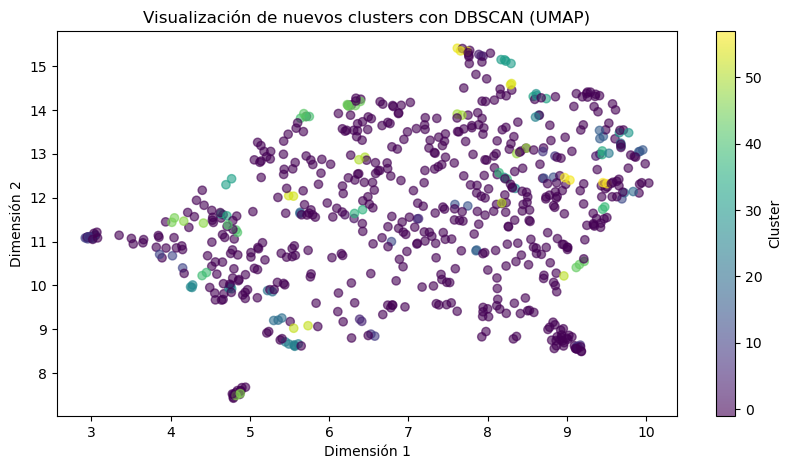

In [170]:
# Combinar todas las características (asegurando que estén correctamente preprocesadas)
X_combined_outliers = np.hstack((
    # np.array(outliers['embeddings_title_std_lemma'].tolist()),  # Embeddings de OpenAI (opcional)
    image_features,
    price_features,
    brand_encoded,
    # gtin_encoded
))

# Aplicar DBSCAN
print("\nAplicando DBSCAN...")
dbscan = DBSCAN(eps=4.2, min_samples=2, metric='euclidean')
new_labels = dbscan.fit_predict(X_combined_outliers)

# Agregar nuevas etiquetas de cluster
df_merged['new_cluster'] = new_labels

# Calcular métricas de evaluación
valid_points = new_labels != -1
X_valid = X_combined_outliers[valid_points]
labels_valid = new_labels[valid_points]

if len(set(labels_valid)) > 1:
    silhouette_avg = silhouette_score(X_valid, labels_valid, metric='cosine')
    davies_bouldin = davies_bouldin_score(X_valid, labels_valid)
    print(f"\nSilhouette Score (nuevos clusters): {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Score (nuevos clusters): {davies_bouldin:.4f}")
else:
    print("\nNo se pueden calcular métricas debido a un número insuficiente de clusters.")

# Calcular número de outliers y porcentaje de ruido
num_outliers = (new_labels == -1).sum()
total_points = len(new_labels)
noise_ratio = num_outliers / total_points
print(f"\nNúmero de outliers detectados: {num_outliers}")
print(f"Porcentaje de ruido: {noise_ratio:.2%}")

# Reducir dimensiones con UMAP
print("\nReduciendo dimensiones con UMAP para visualización...")
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_reducer.fit_transform(X_combined_outliers)

# Visualización
plt.figure(figsize=(10, 5))
scatter = plt.scatter(
    X_umap_2d[:, 0],
    X_umap_2d[:, 1],
    c=new_labels,
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label="Cluster")
plt.title("Visualización de nuevos clusters con DBSCAN (UMAP)")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(False)
plt.show()


Este código tiene como objetivo visualizar los productos agrupados en los 60 clusters más grandes generados por un modelo de clustering. A continuación, se detalla su funcionamiento y propósito:

### 1. **Selección de clusters más grandes**
El código identifica los 60 clusters con más productos en el conjunto de datos y prepara la información para su análisis visual. Esto se realiza utilizando la columna que contiene las etiquetas de los clusters generadas por el modelo.

### 2. **Preparación de los datos**
Para cada cluster seleccionado, se filtran los productos correspondientes. Además, se limita el número de productos visualizados por cluster a un máximo (por ejemplo, 35) para mantener la claridad en las gráficas.

### 3. **Diseño de la visualización**
Se organiza dinámicamente el número de filas y columnas en una cuadrícula, asegurando que las imágenes de los productos se distribuyan de forma clara y ordenada en la figura. Cada imagen se coloca en su propio espacio dentro de la cuadrícula.

### 4. **Descarga y visualización de imágenes**
Las imágenes de los productos se obtienen desde URLs almacenadas en el conjunto de datos. Estas se muestran en los subplots correspondientes, acompañadas por el título del producto. Si ocurre un error al cargar una imagen, se indica que no está disponible.

### 5. **Títulos descriptivos**
Cada imagen se etiqueta con el título del producto asociado, ajustado en longitud para que se muestre de manera legible dentro del espacio asignado.

### 6. **Gestión de subplots sobrantes**
Si hay más espacios disponibles en la cuadrícula que productos para mostrar, los espacios adicionales se desactivan para mantener la estética visual.

### 7. **Ajuste del diseño**
Se ajustan los márgenes y el espacio disponible para que todas las imágenes y títulos se presenten de forma clara, y se incluye un título principal que describe el cluster visualizado.

### 8. **Propósito**
El propósito principal de este código es proporcionar una forma visual de inspeccionar los clusters generados por el modelo. Esto facilita la validación de los resultados del clustering, permitiendo identificar patrones comunes o posibles inconsistencias dentro de cada grupo. La representación visual también ayuda a comunicar los hallazgos de manera efectiva.

60 Clusters con más productos:
new_cluster
-1     553
 24      6
 10      5
 44      5
 31      4
 7       3
 15      3
 11      3
 16      3
 23      3
 20      3
 26      3
 41      3
 55      3
 43      3
 0       3
 3       3
 9       2
 8       2
 17      2
 14      2
 6       2
 5       2
 2       2
 4       2
 1       2
 13      2
 25      2
 22      2
 19      2
 21      2
 18      2
 12      2
 29      2
 28      2
 33      2
 34      2
 36      2
 35      2
 37      2
 30      2
 32      2
 27      2
 40      2
 39      2
 38      2
 42      2
 46      2
 47      2
 48      2
 45      2
 49      2
 50      2
 52      2
 51      2
 53      2
 54      2
 56      2
 57      2
Name: count, dtype: int64

Cluster -1 - Mostrando 35 de 553 productos:


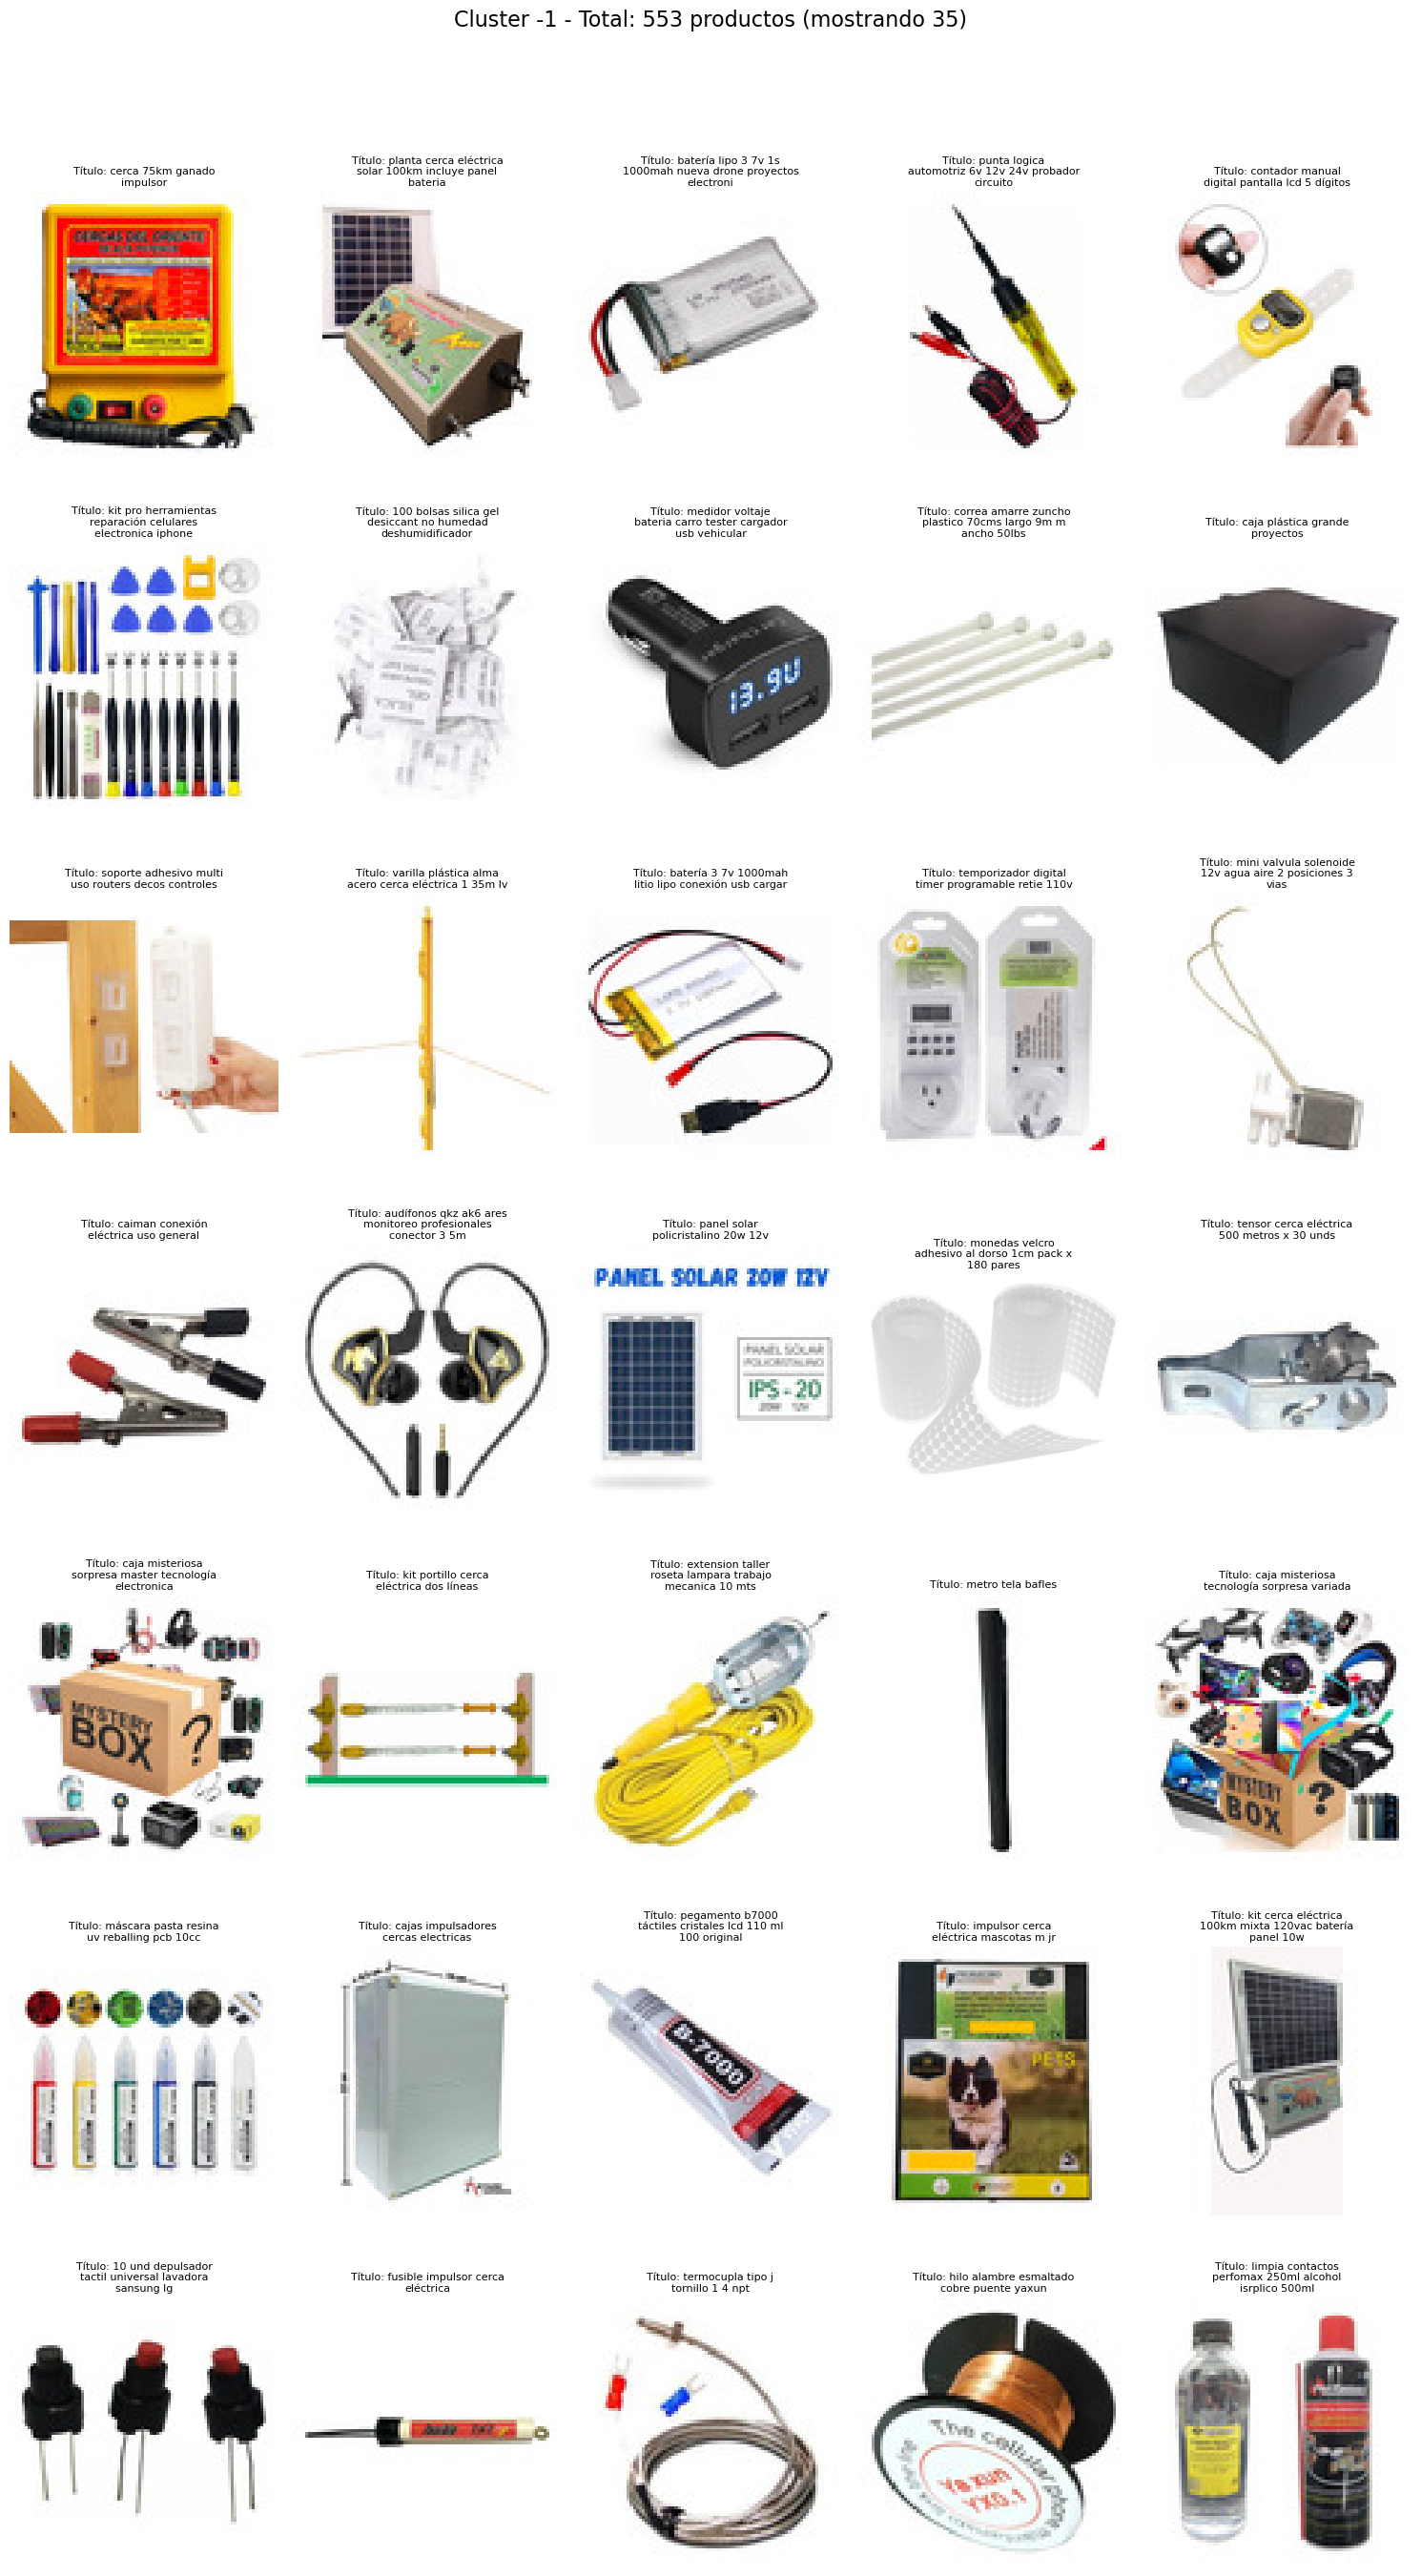


Cluster 24 - Mostrando 6 de 6 productos:


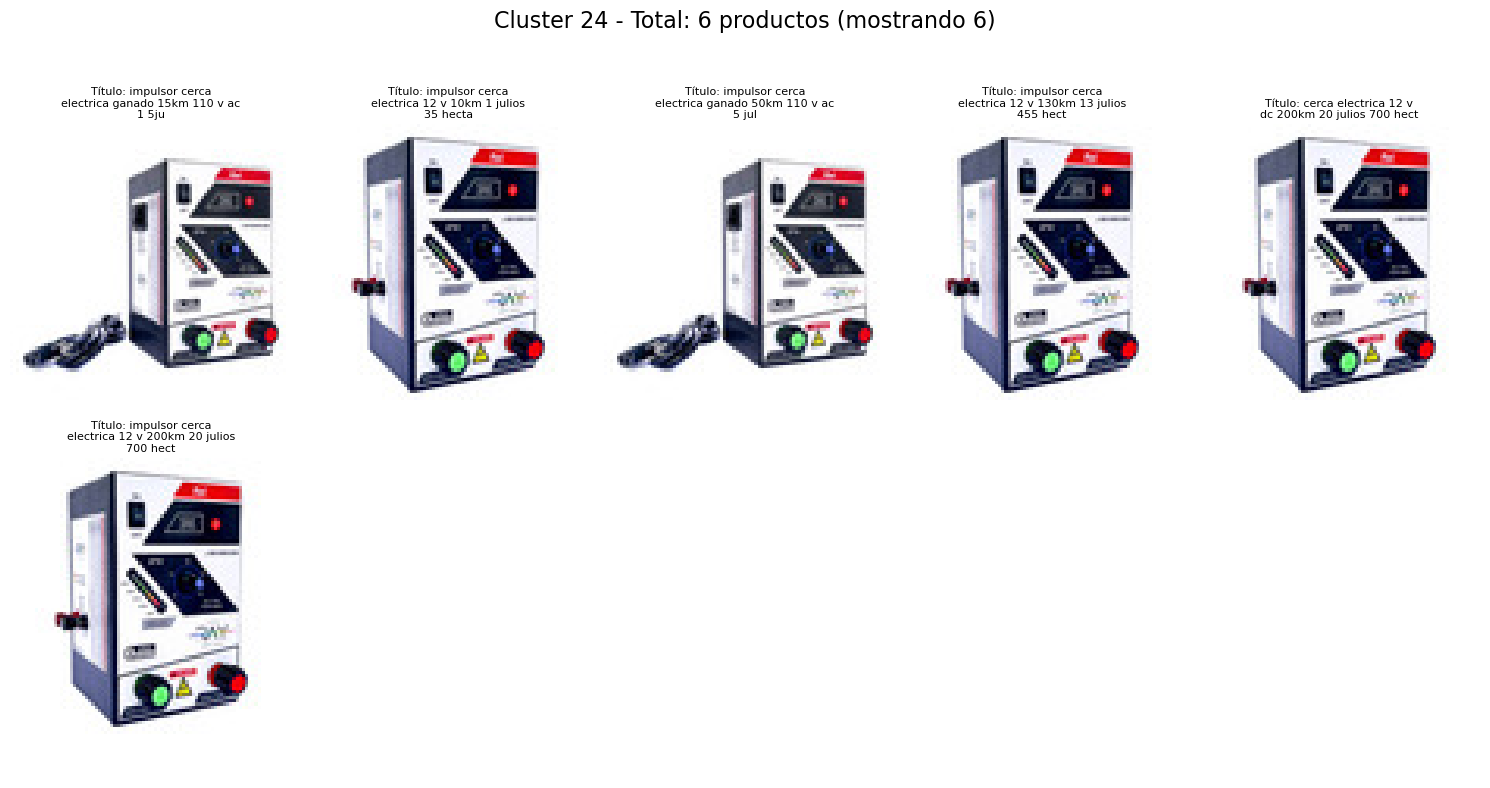


Cluster 10 - Mostrando 5 de 5 productos:


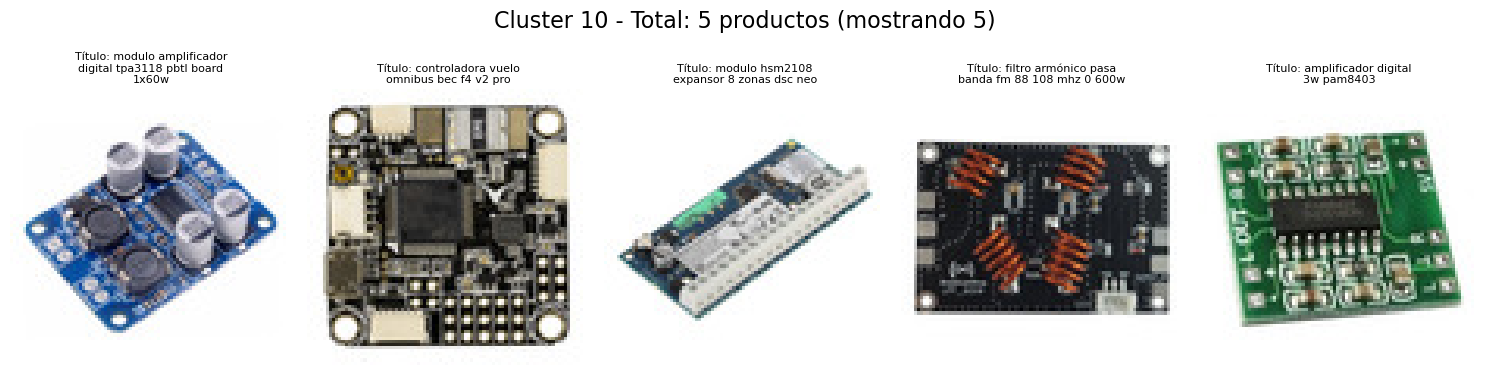


Cluster 44 - Mostrando 5 de 5 productos:


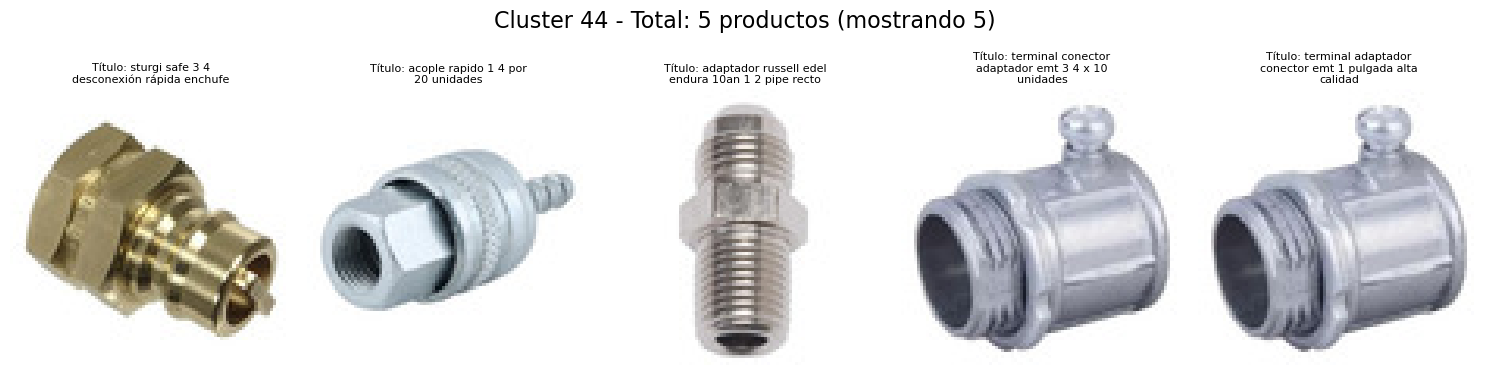


Cluster 31 - Mostrando 4 de 4 productos:


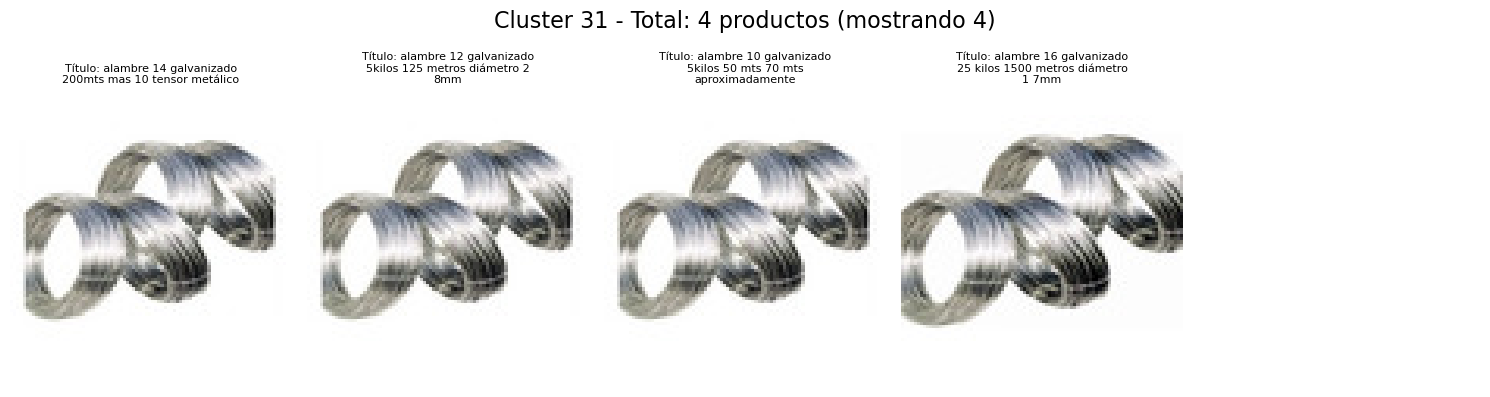


Cluster 7 - Mostrando 3 de 3 productos:


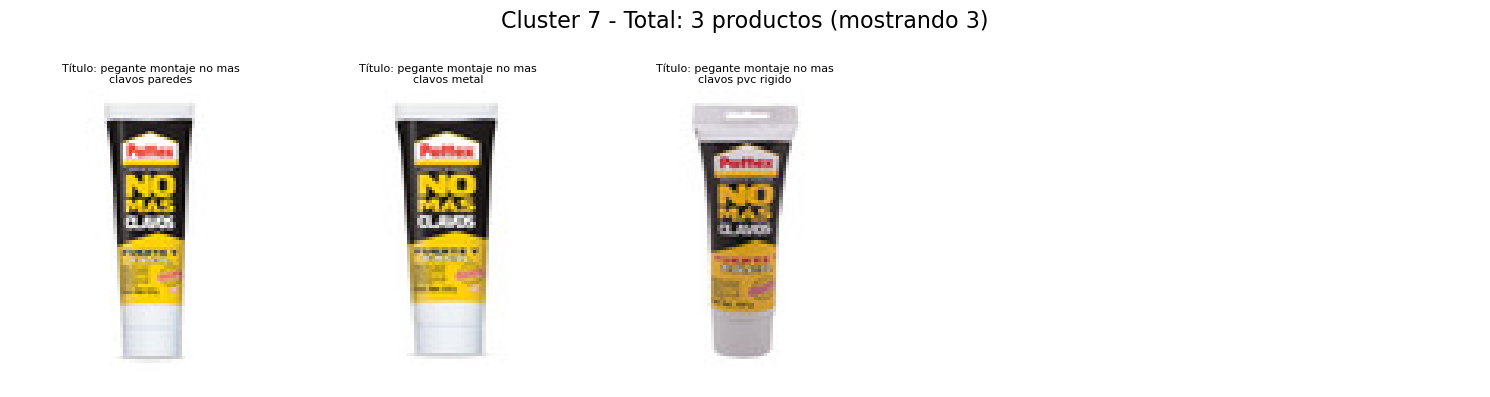


Cluster 15 - Mostrando 3 de 3 productos:


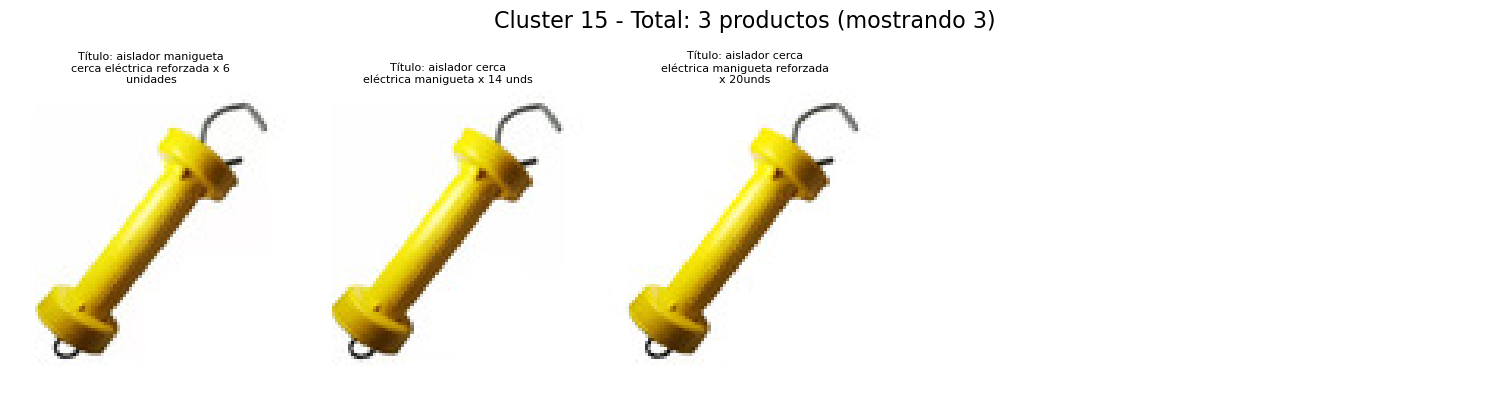


Cluster 11 - Mostrando 3 de 3 productos:


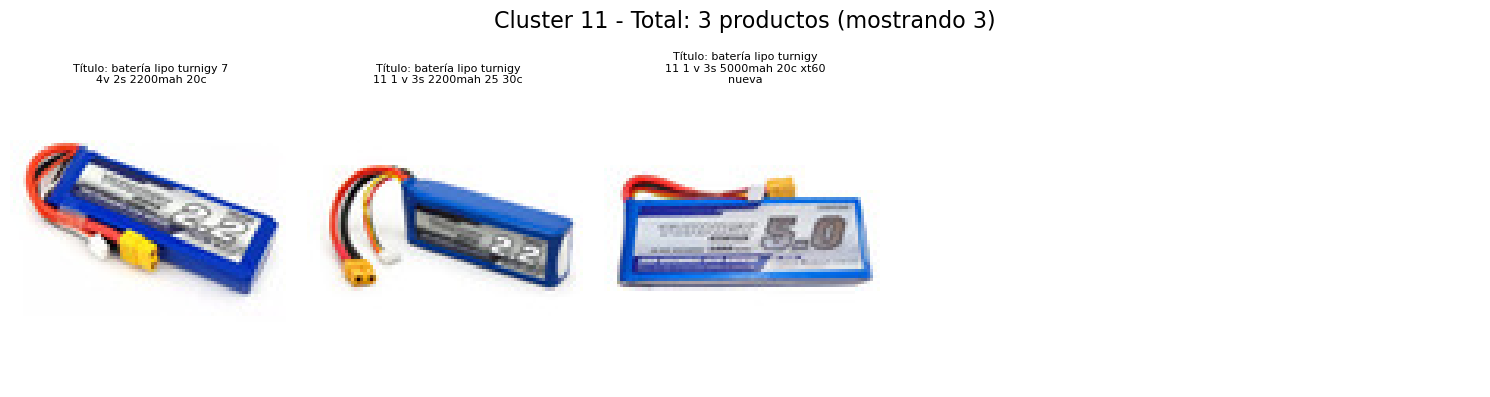


Cluster 16 - Mostrando 3 de 3 productos:


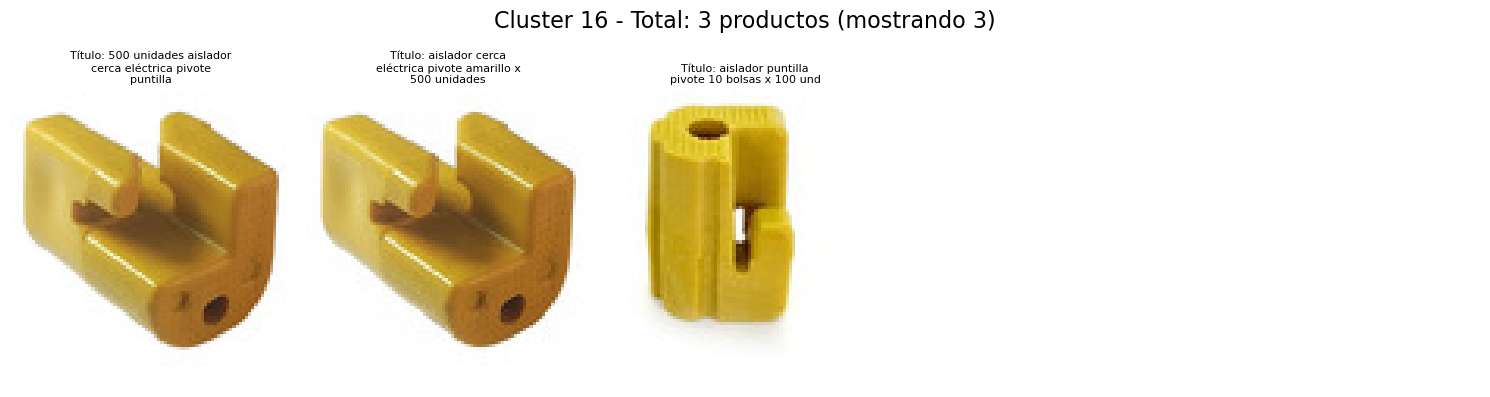


Cluster 23 - Mostrando 3 de 3 productos:


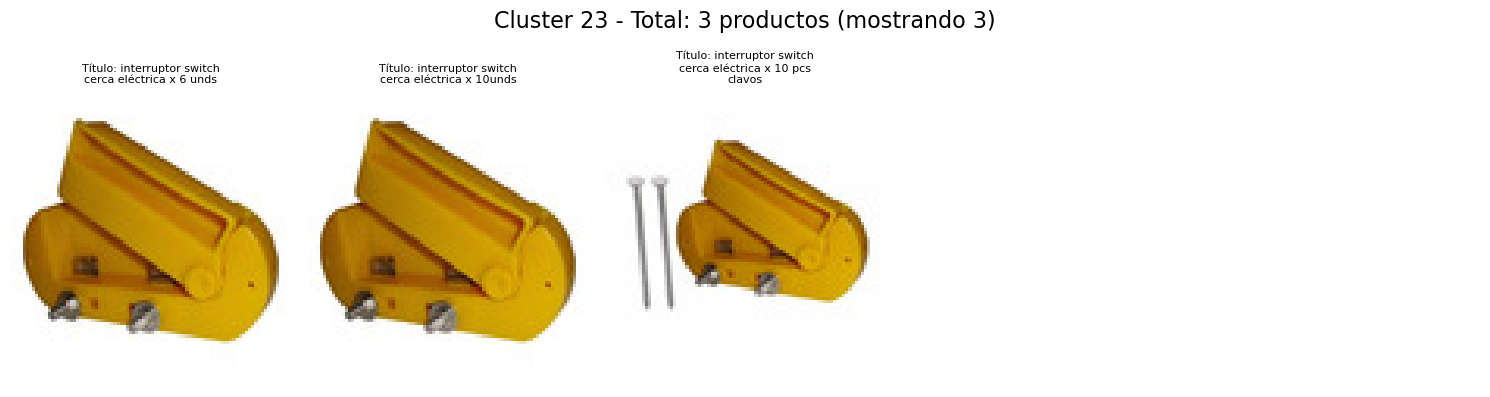


Cluster 20 - Mostrando 3 de 3 productos:


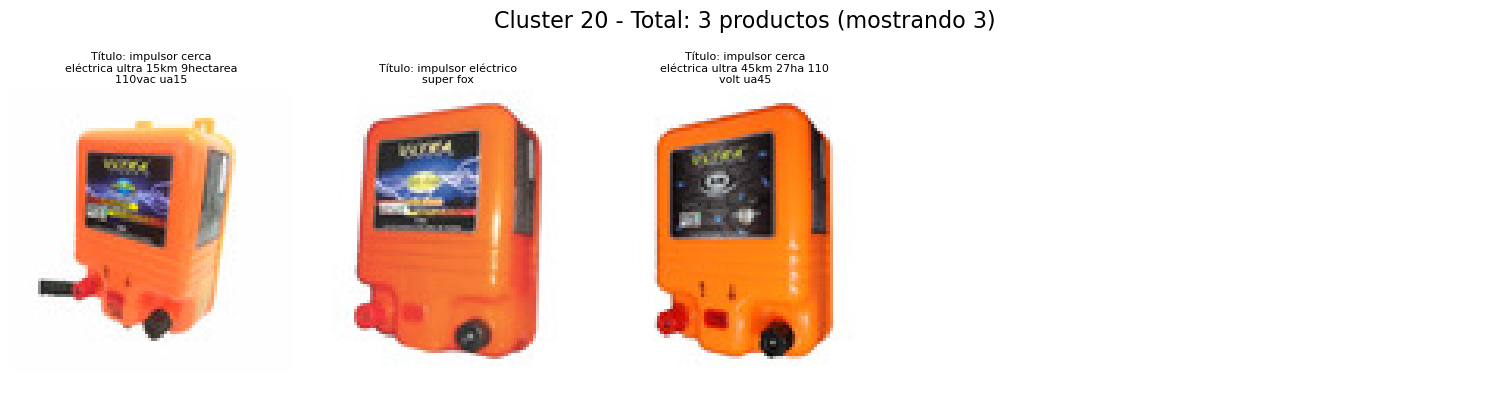


Cluster 26 - Mostrando 3 de 3 productos:


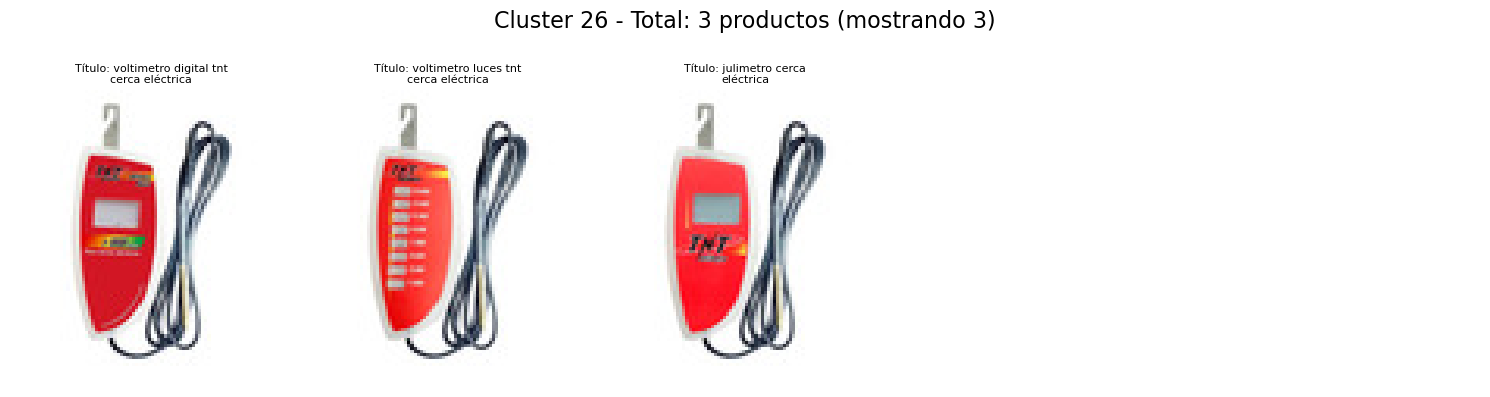


Cluster 41 - Mostrando 3 de 3 productos:


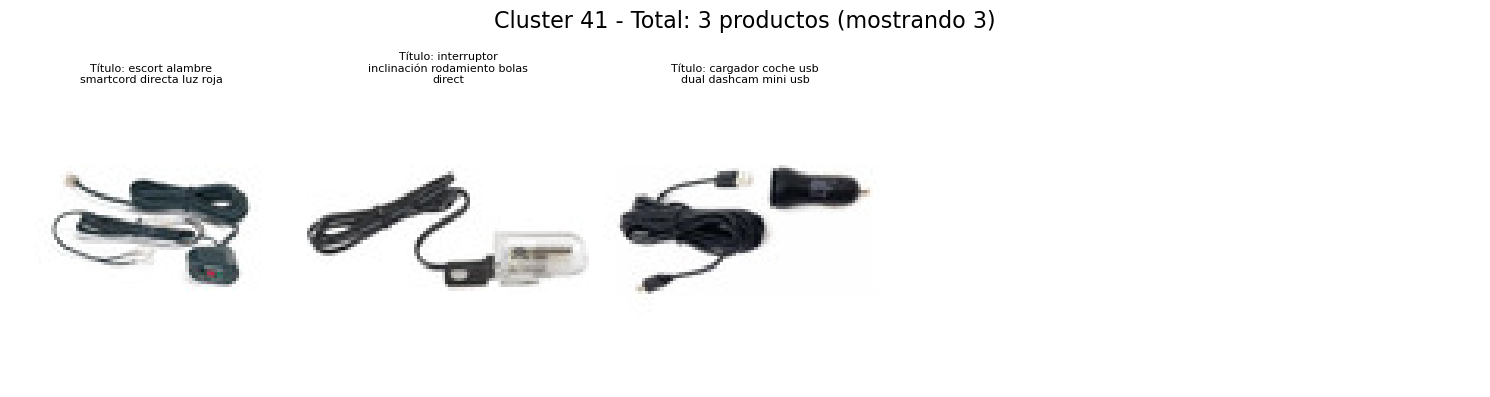


Cluster 55 - Mostrando 3 de 3 productos:


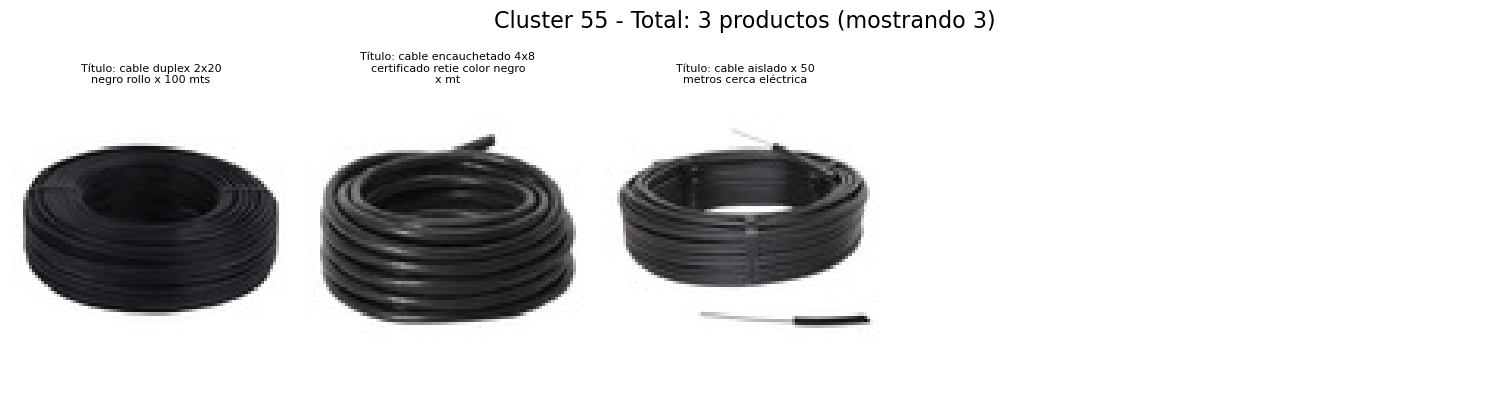


Cluster 43 - Mostrando 3 de 3 productos:


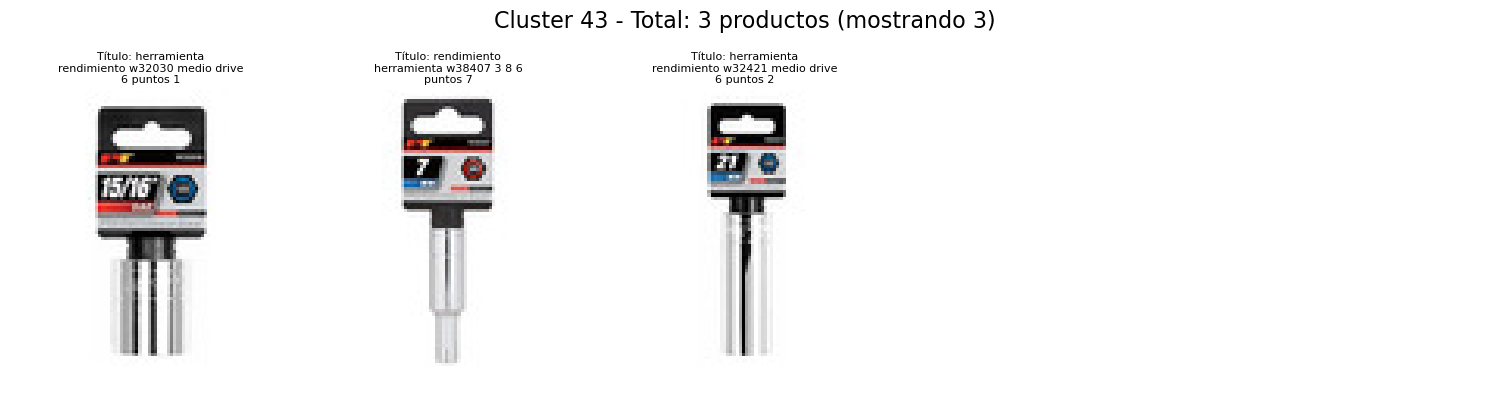


Cluster 0 - Mostrando 3 de 3 productos:


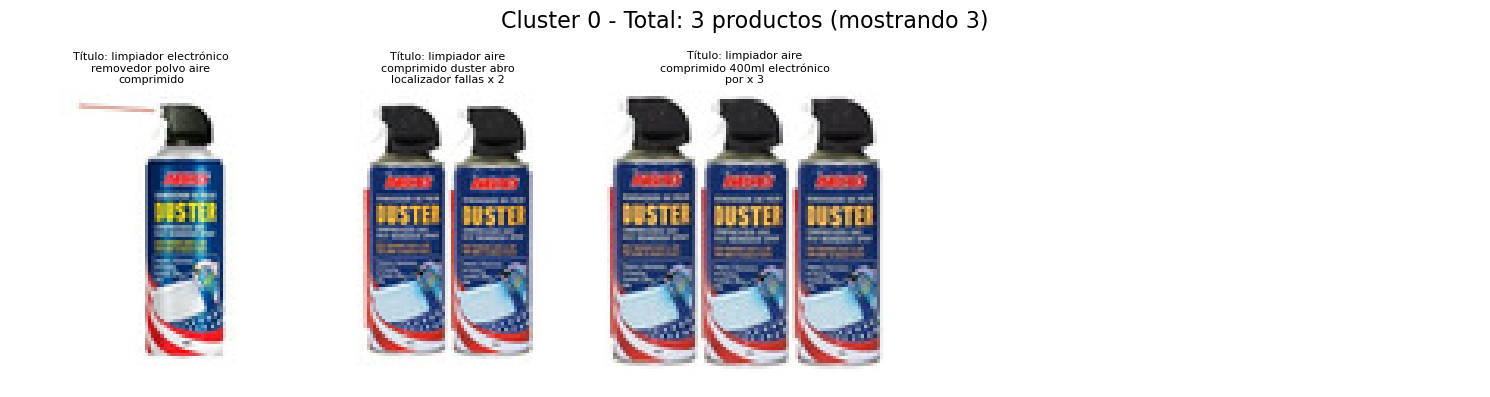


Cluster 3 - Mostrando 3 de 3 productos:


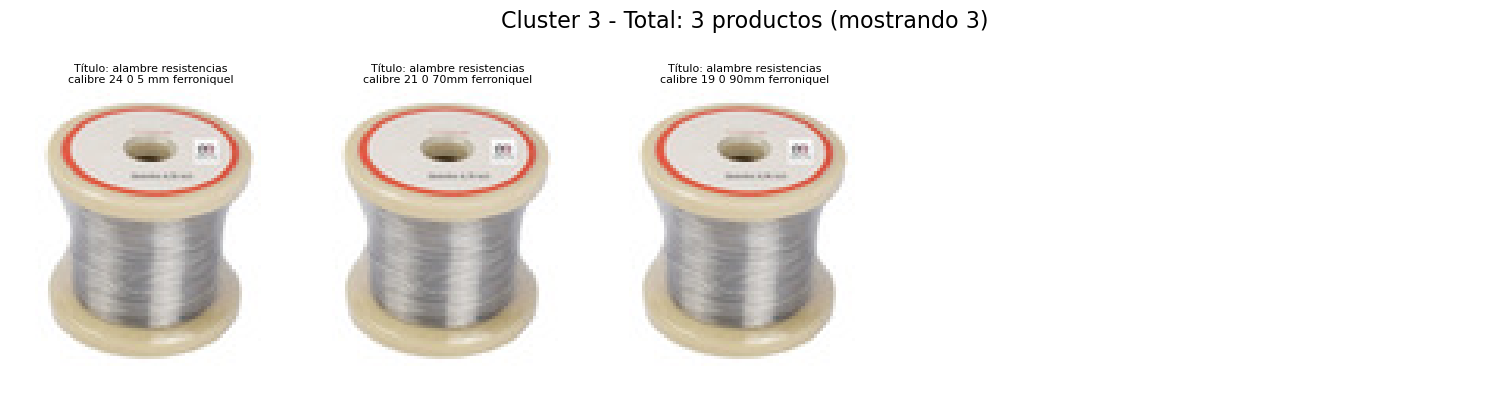


Cluster 9 - Mostrando 2 de 2 productos:


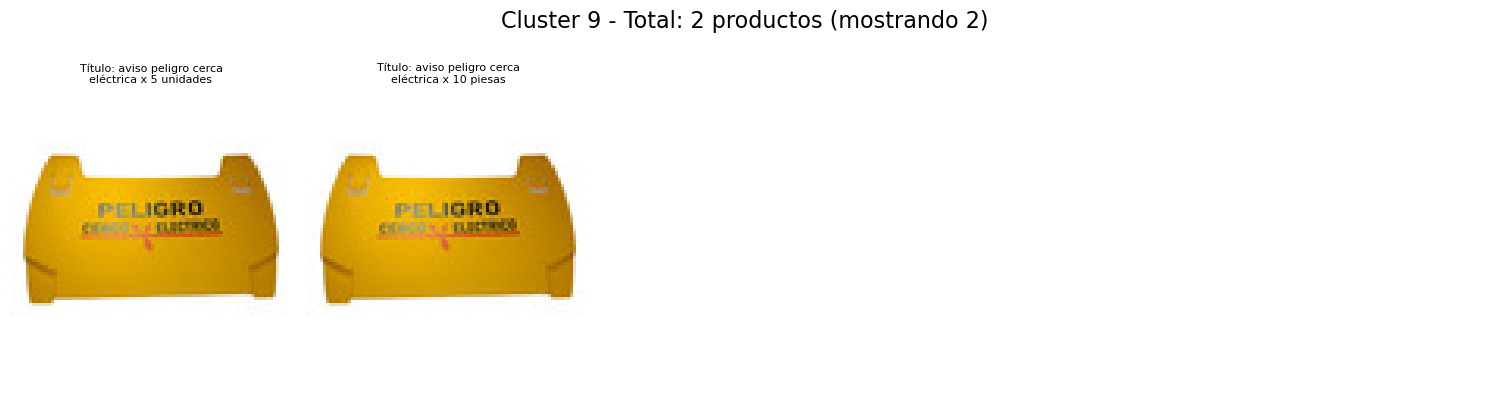


Cluster 8 - Mostrando 2 de 2 productos:


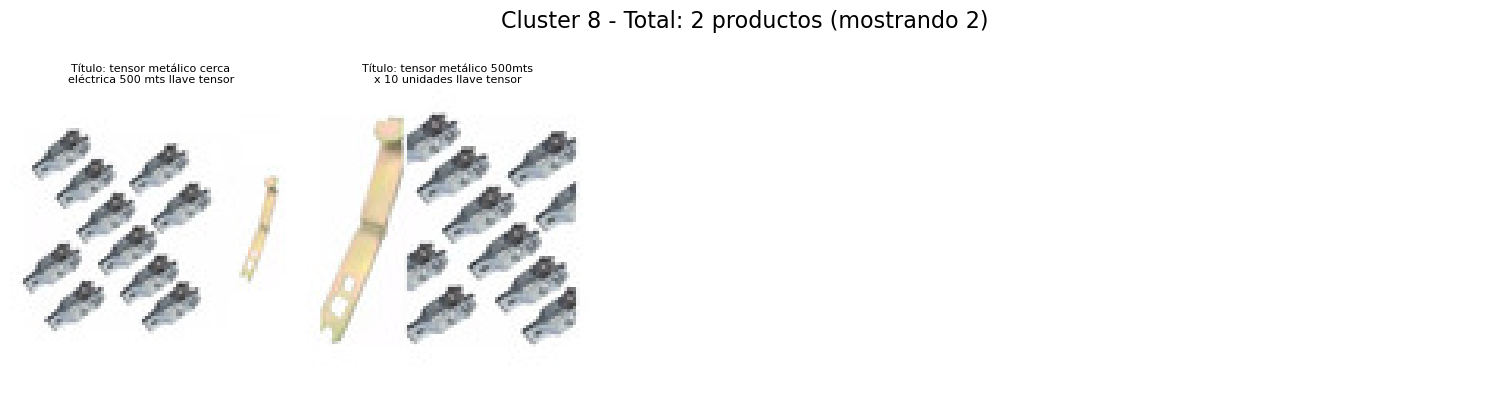


Cluster 17 - Mostrando 2 de 2 productos:


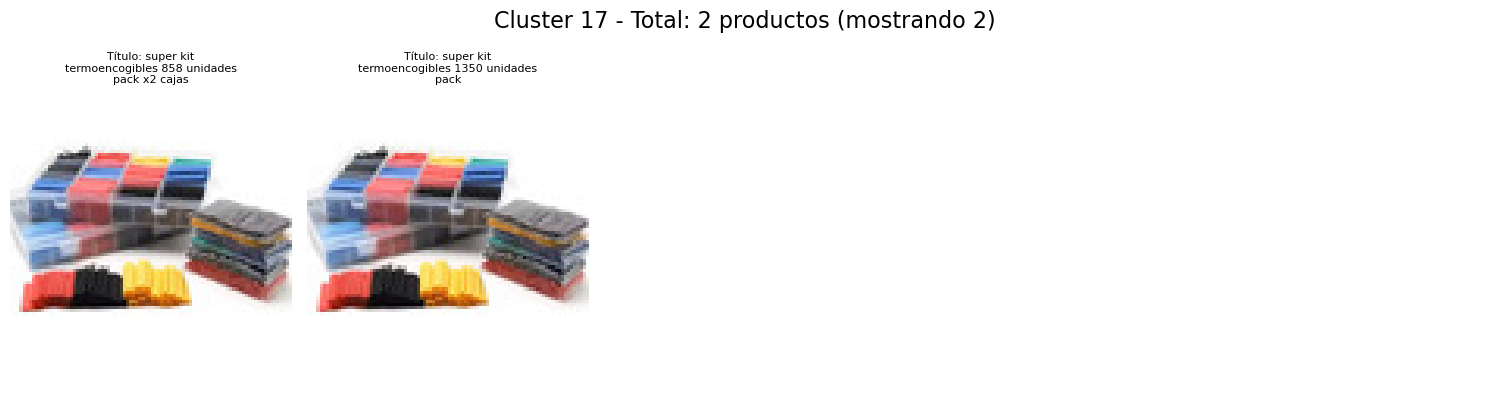


Cluster 14 - Mostrando 2 de 2 productos:


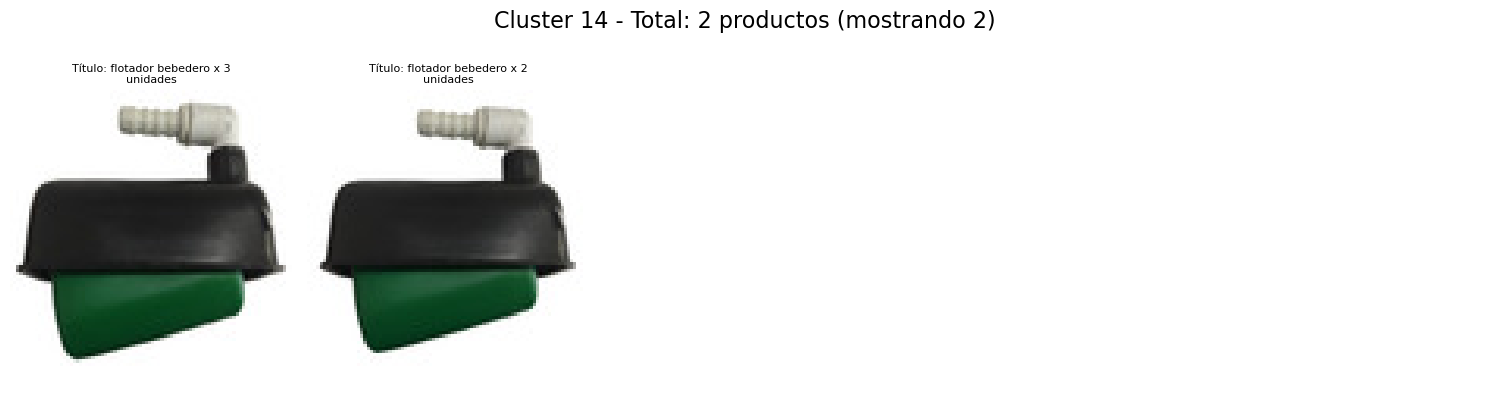


Cluster 6 - Mostrando 2 de 2 productos:


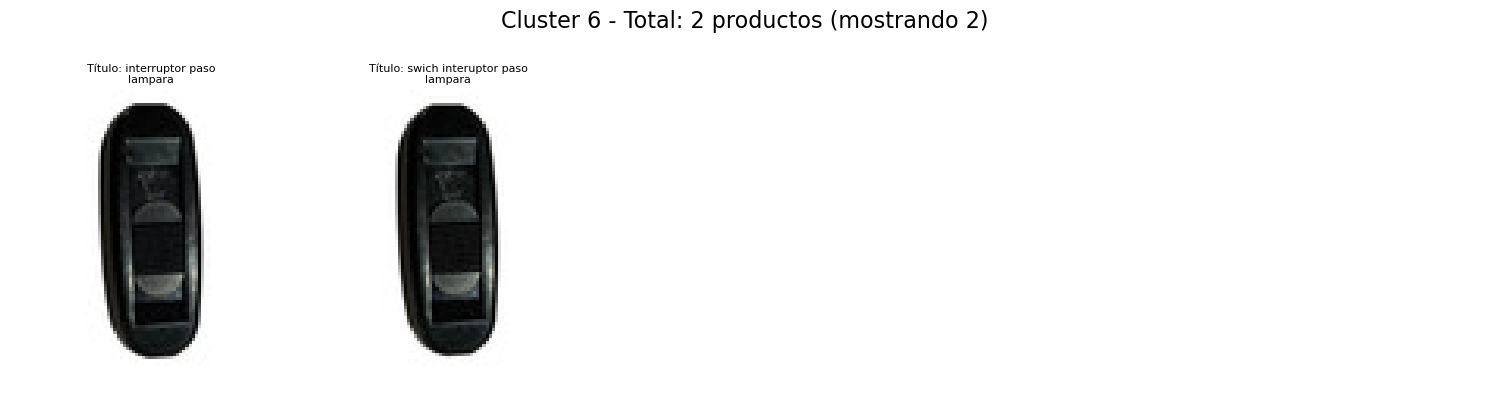


Cluster 5 - Mostrando 2 de 2 productos:


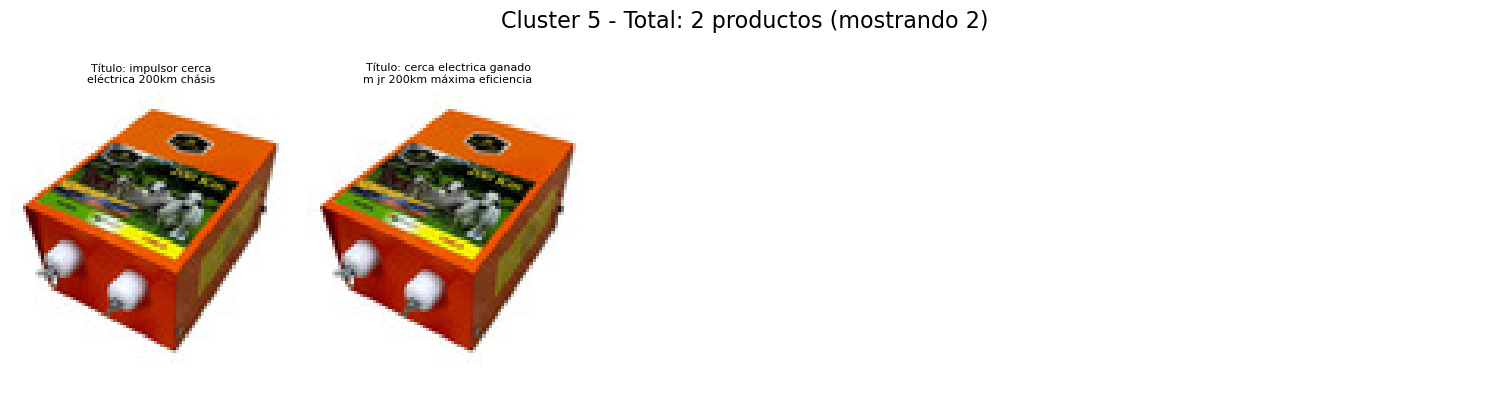


Cluster 2 - Mostrando 2 de 2 productos:


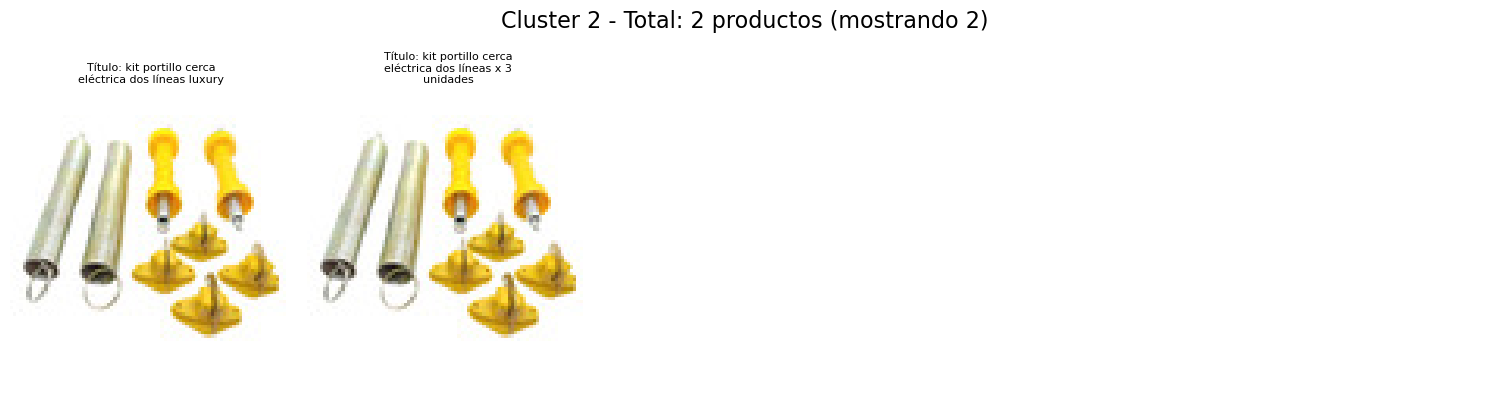


Cluster 4 - Mostrando 2 de 2 productos:


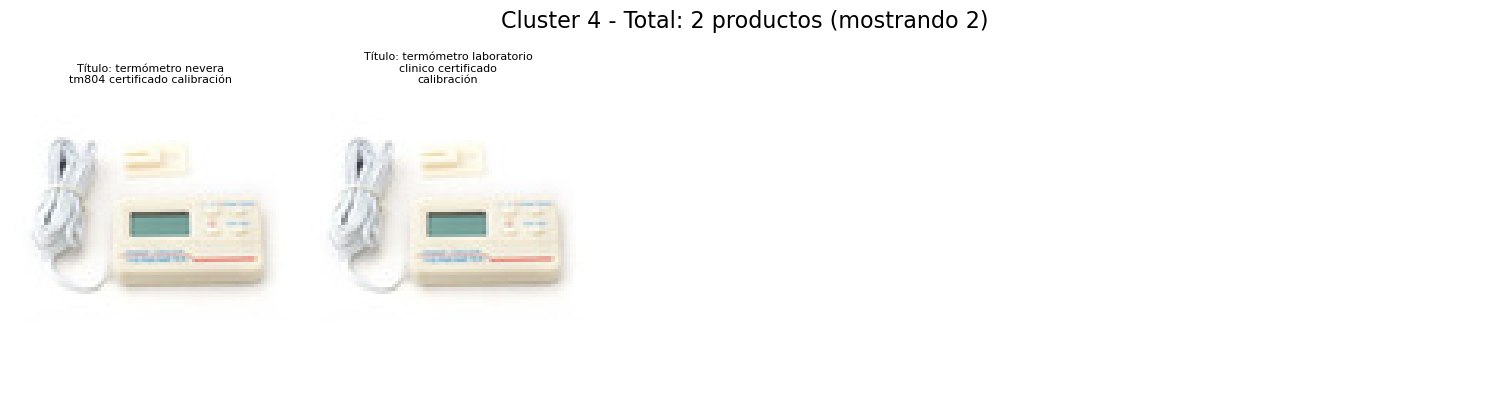


Cluster 1 - Mostrando 2 de 2 productos:


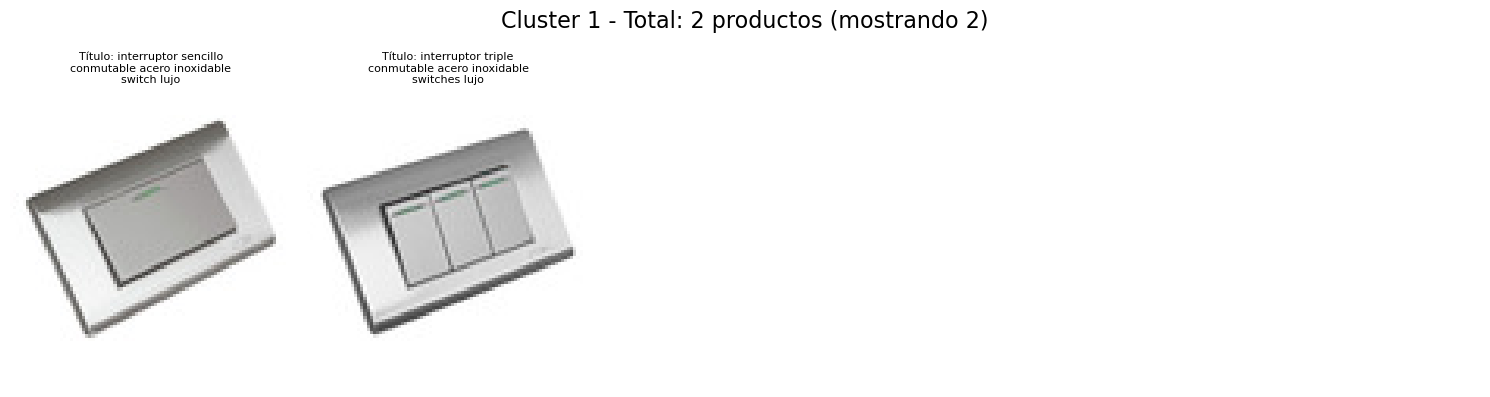


Cluster 13 - Mostrando 2 de 2 productos:


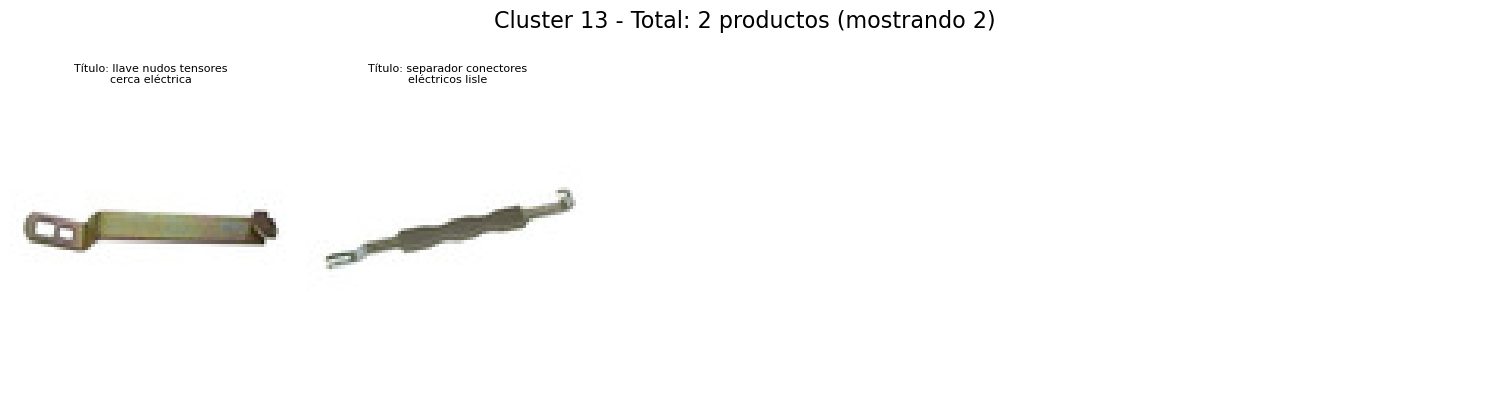


Cluster 25 - Mostrando 2 de 2 productos:


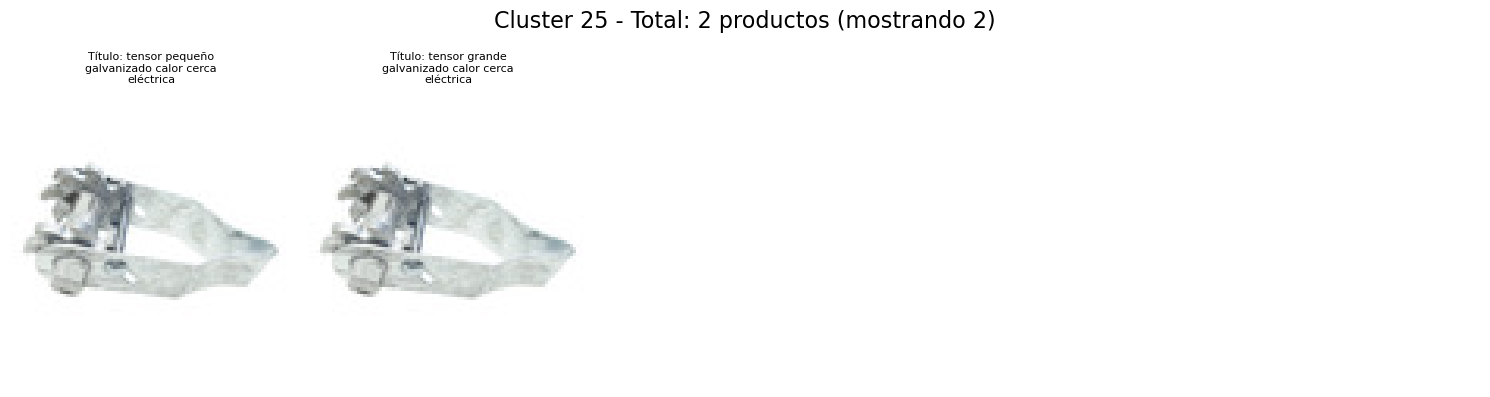


Cluster 22 - Mostrando 2 de 2 productos:


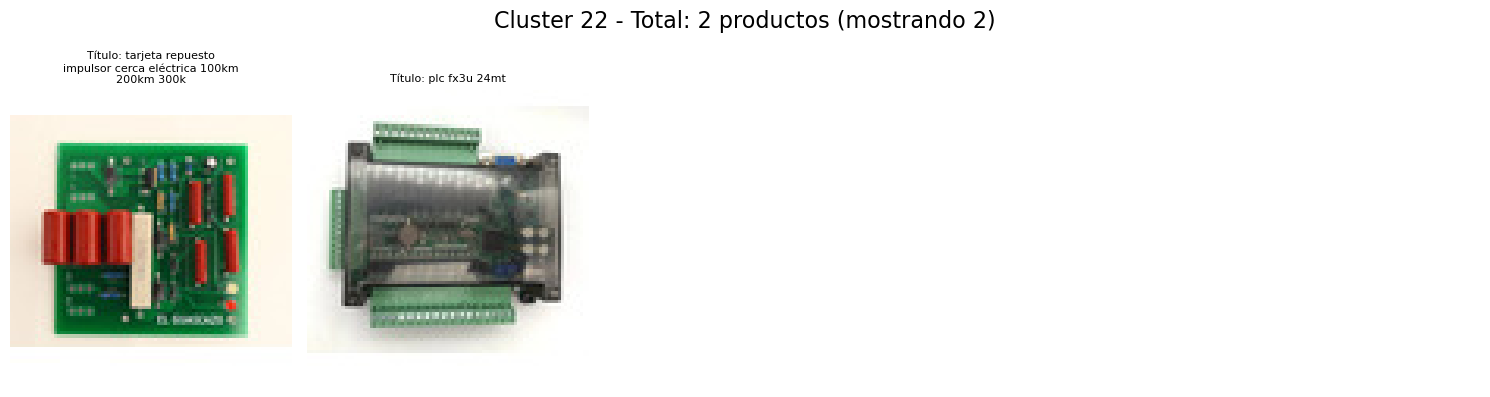


Cluster 19 - Mostrando 2 de 2 productos:


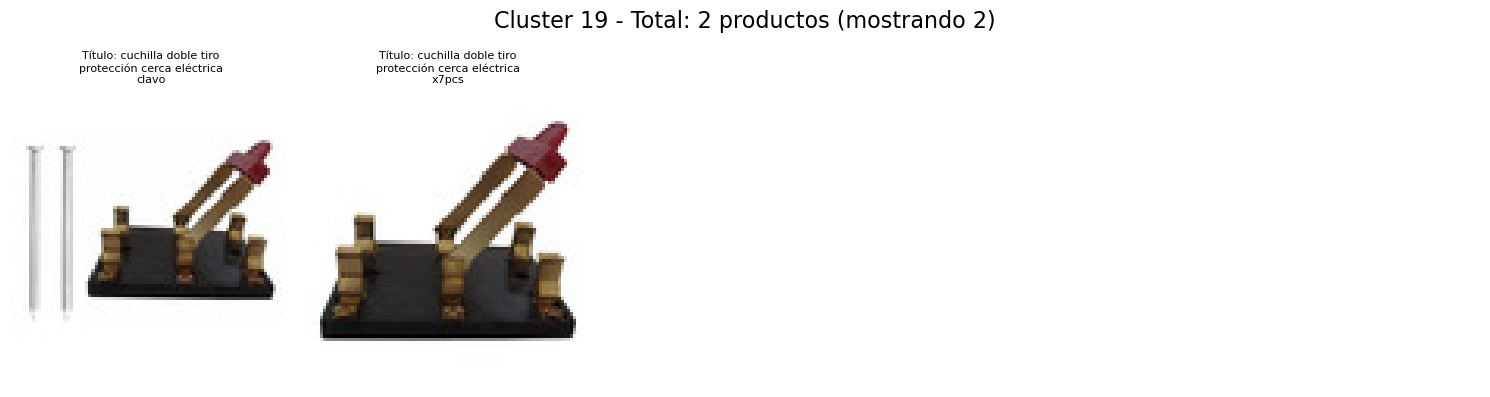


Cluster 21 - Mostrando 2 de 2 productos:


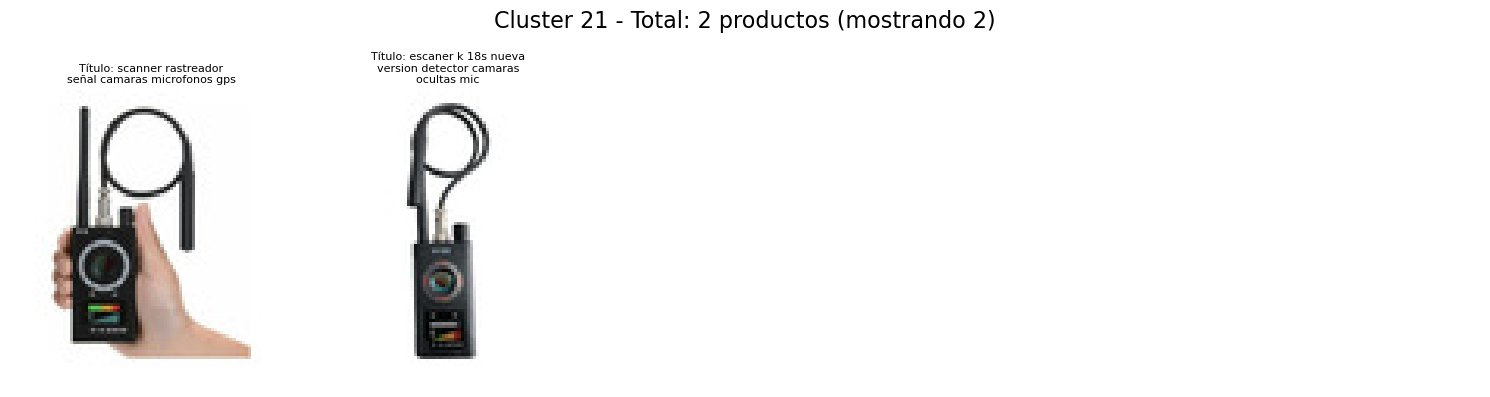


Cluster 18 - Mostrando 2 de 2 productos:


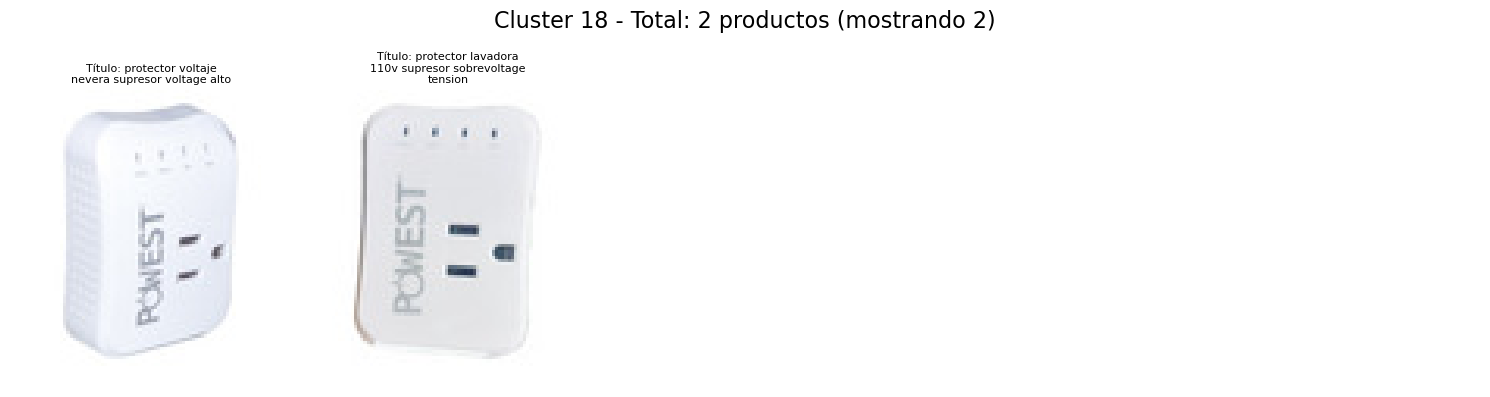


Cluster 12 - Mostrando 2 de 2 productos:


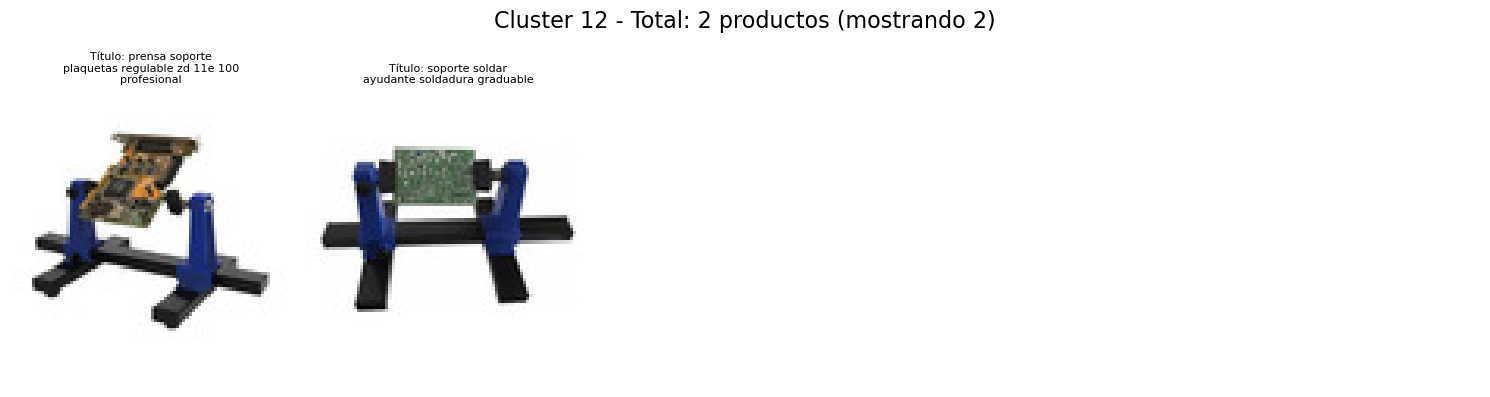


Cluster 29 - Mostrando 2 de 2 productos:


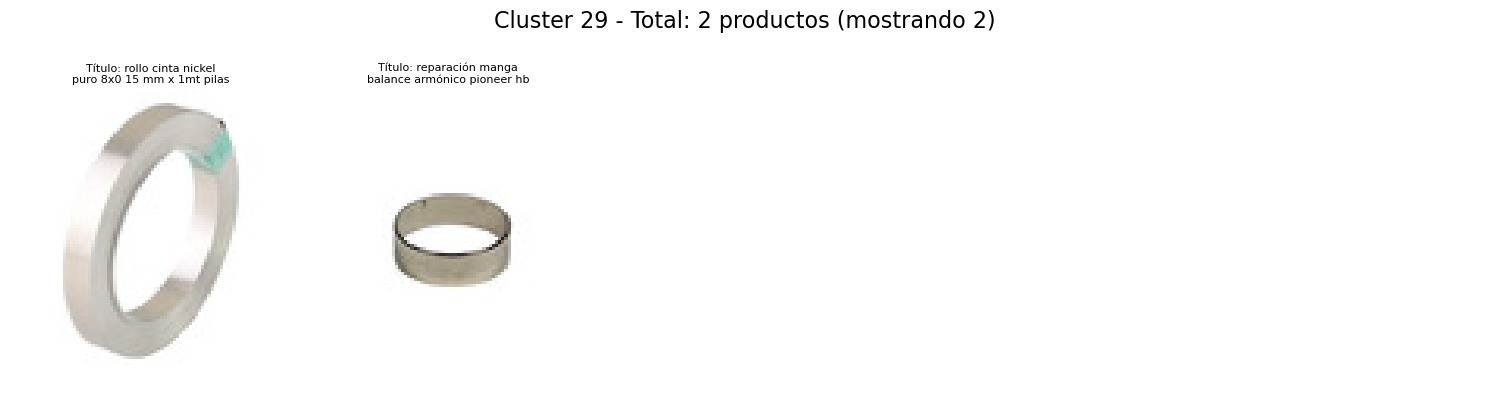


Cluster 28 - Mostrando 2 de 2 productos:


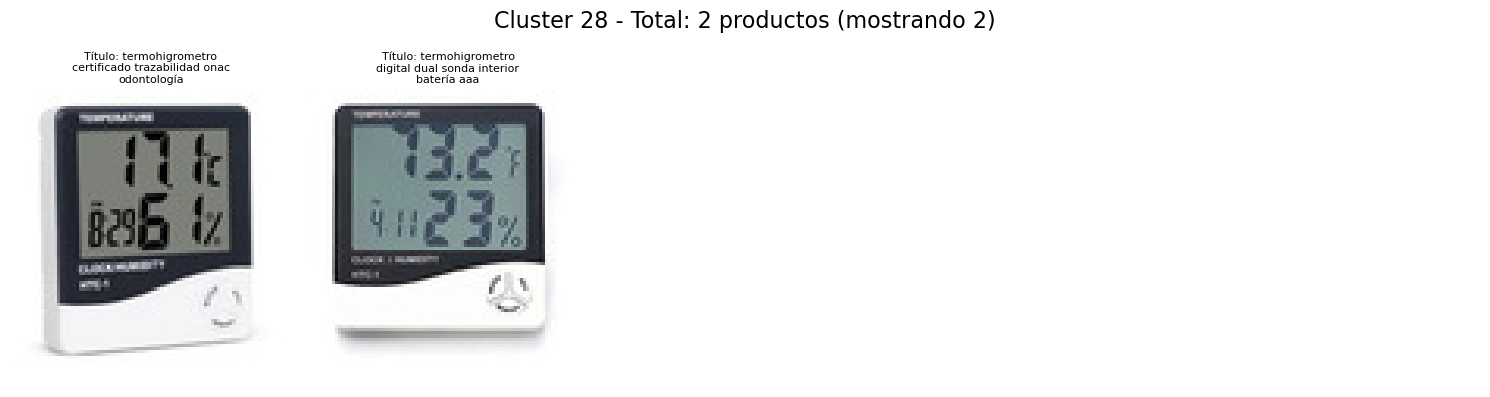


Cluster 33 - Mostrando 2 de 2 productos:


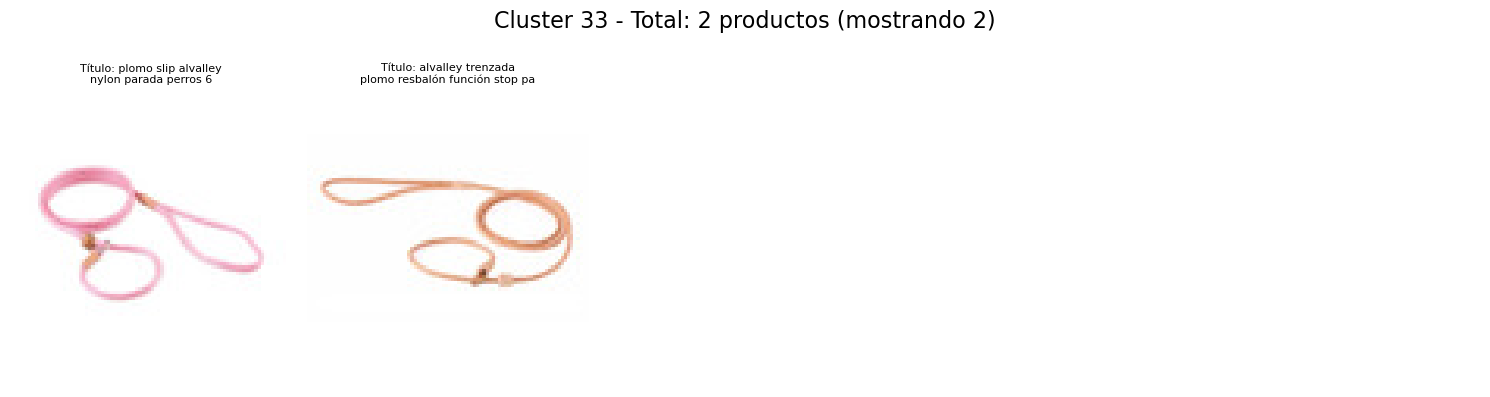


Cluster 34 - Mostrando 2 de 2 productos:


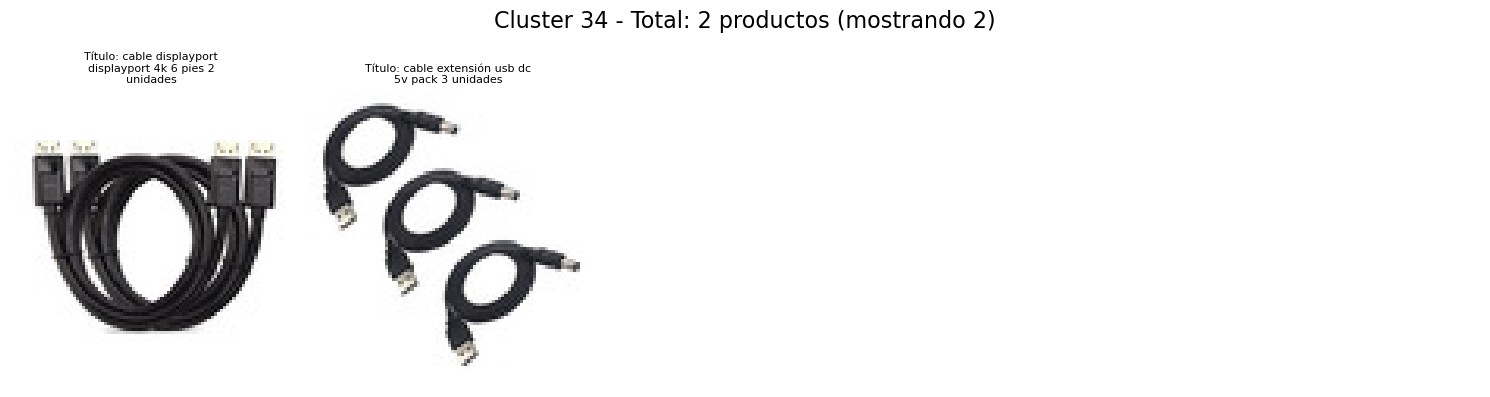


Cluster 36 - Mostrando 2 de 2 productos:


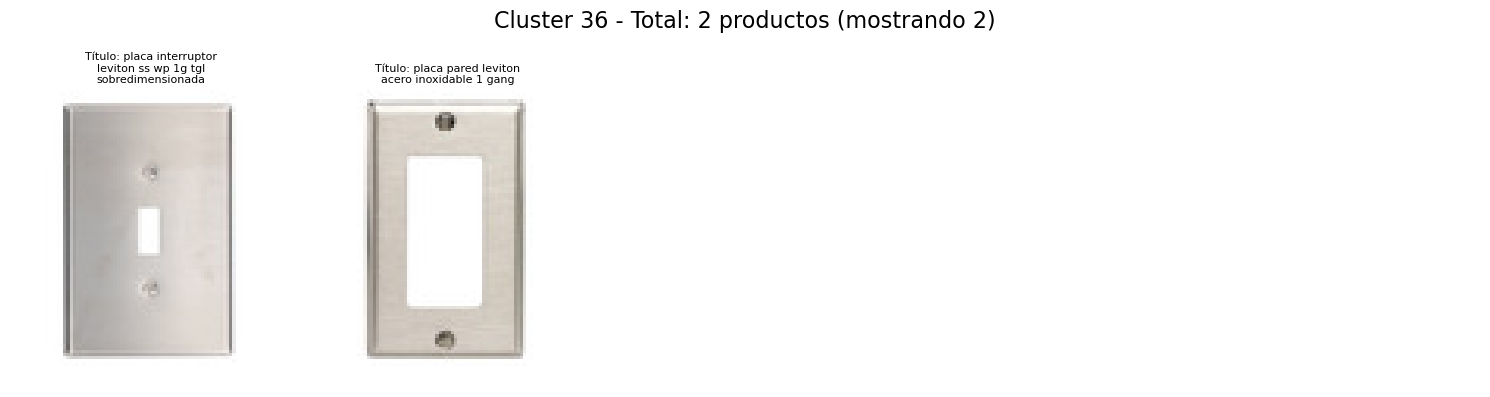


Cluster 35 - Mostrando 2 de 2 productos:


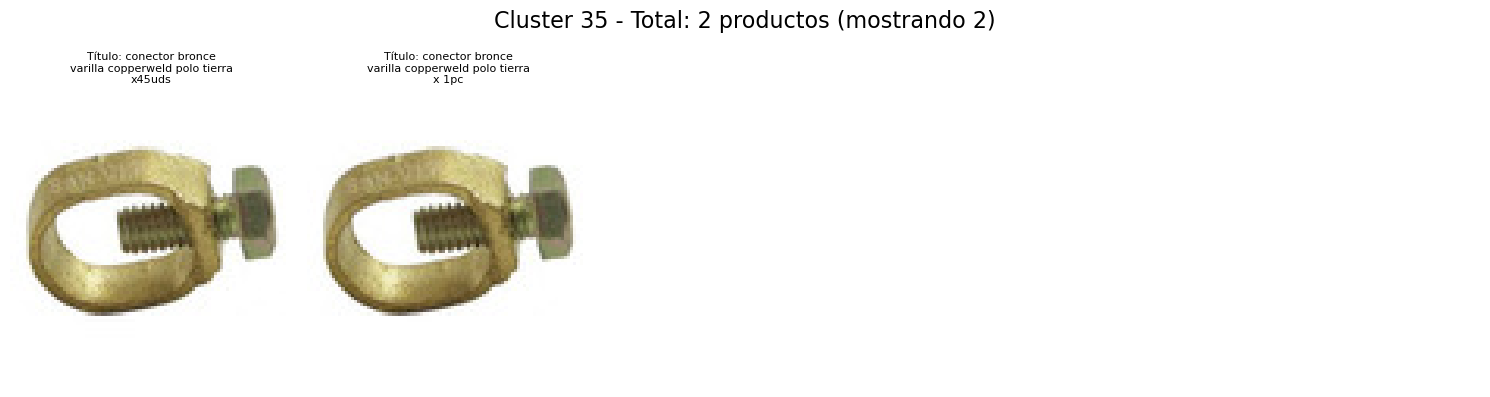


Cluster 37 - Mostrando 2 de 2 productos:


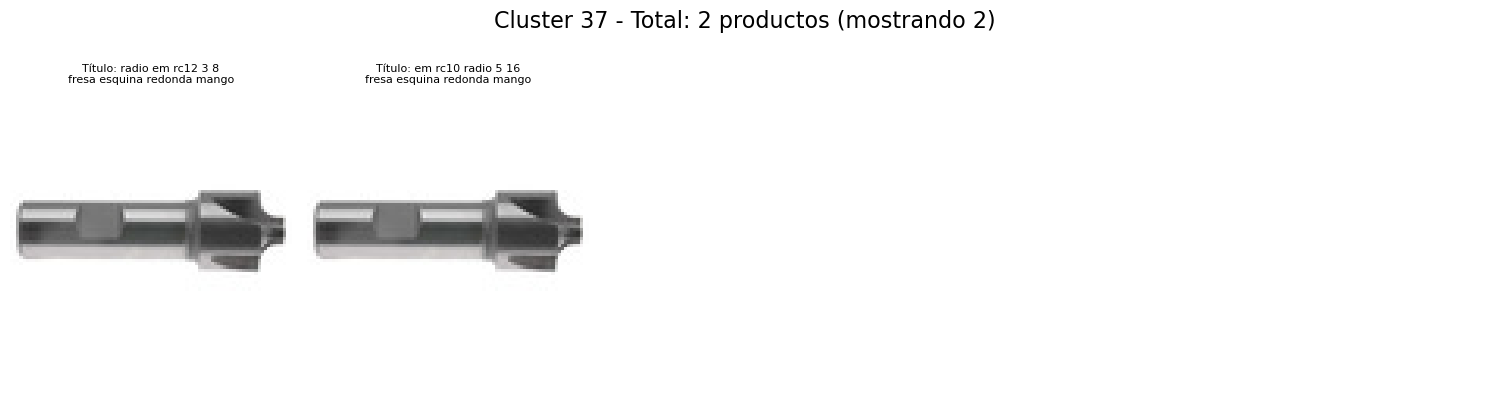


Cluster 30 - Mostrando 2 de 2 productos:


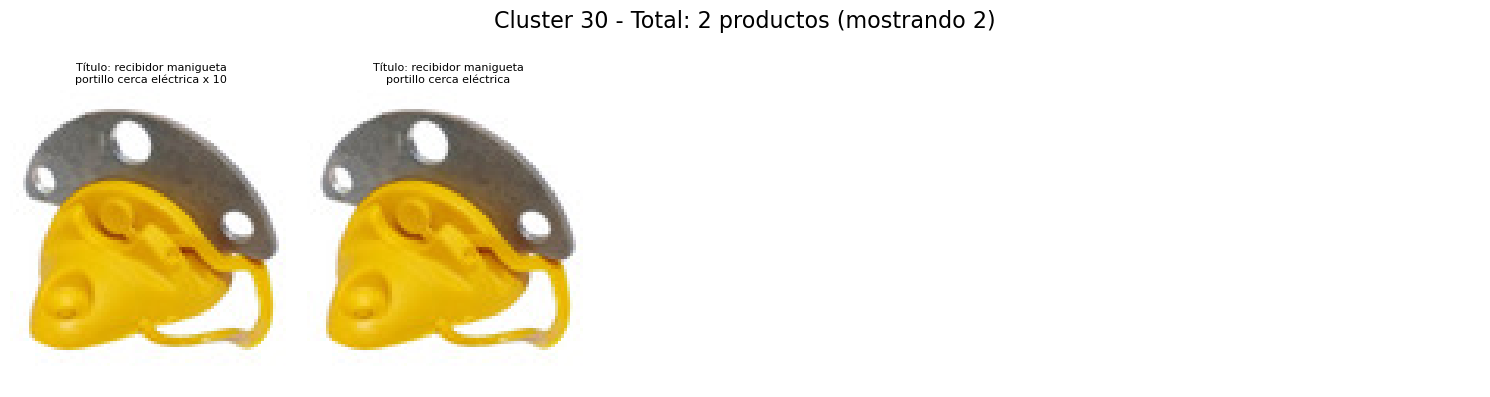


Cluster 32 - Mostrando 2 de 2 productos:


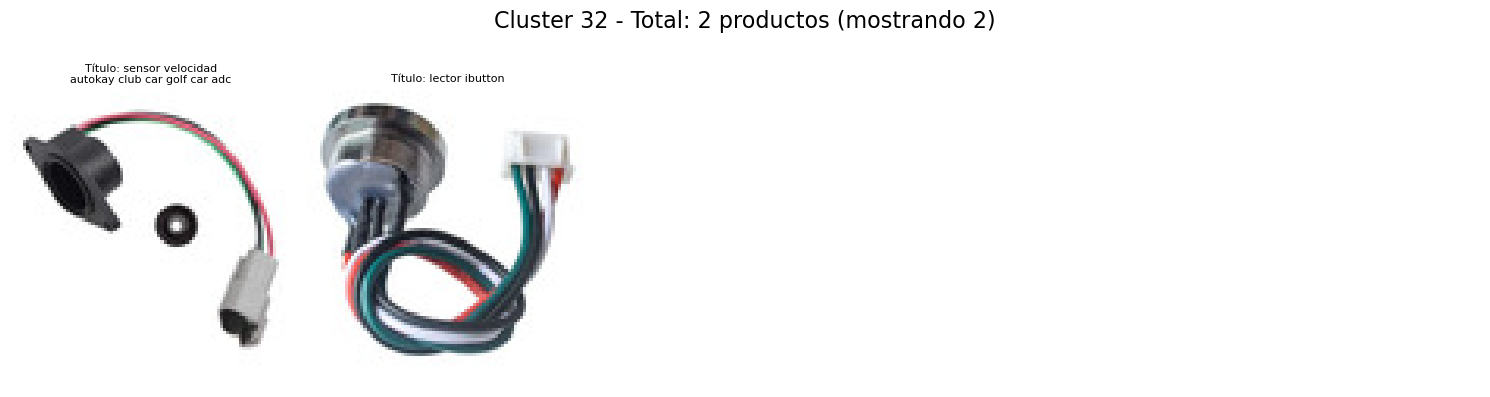


Cluster 27 - Mostrando 2 de 2 productos:


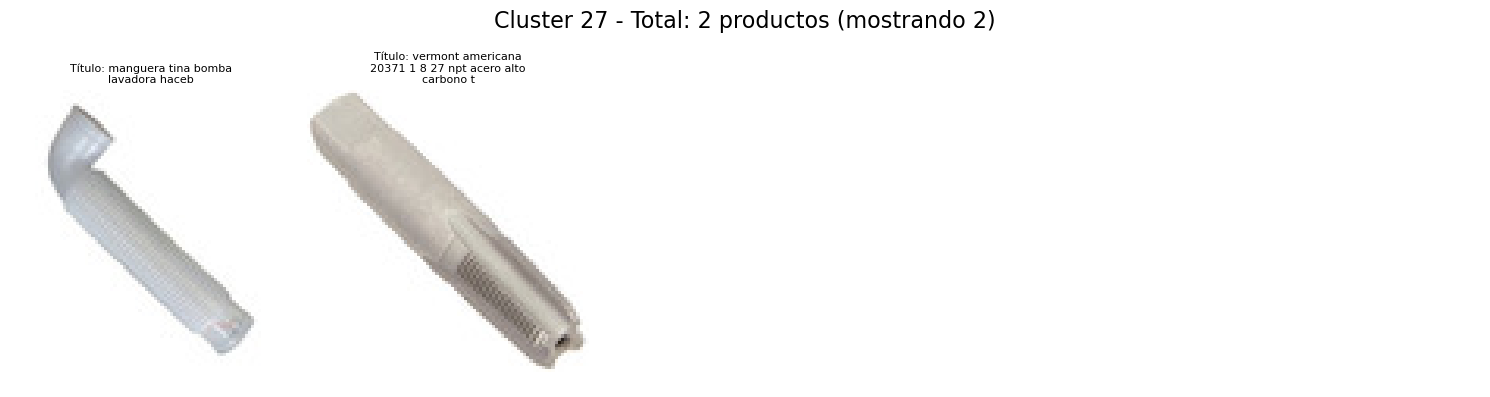


Cluster 40 - Mostrando 2 de 2 productos:


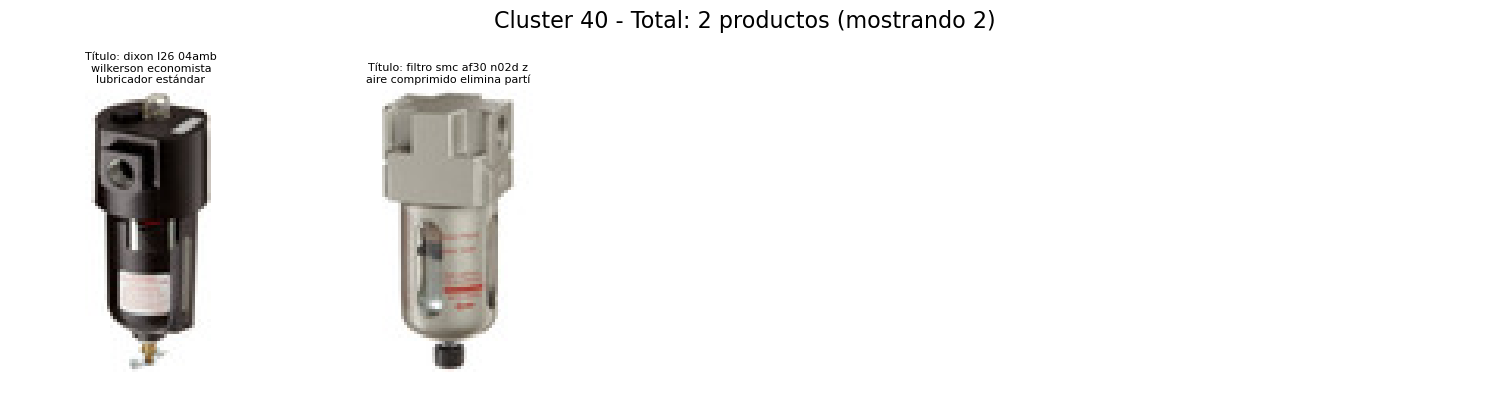


Cluster 39 - Mostrando 2 de 2 productos:


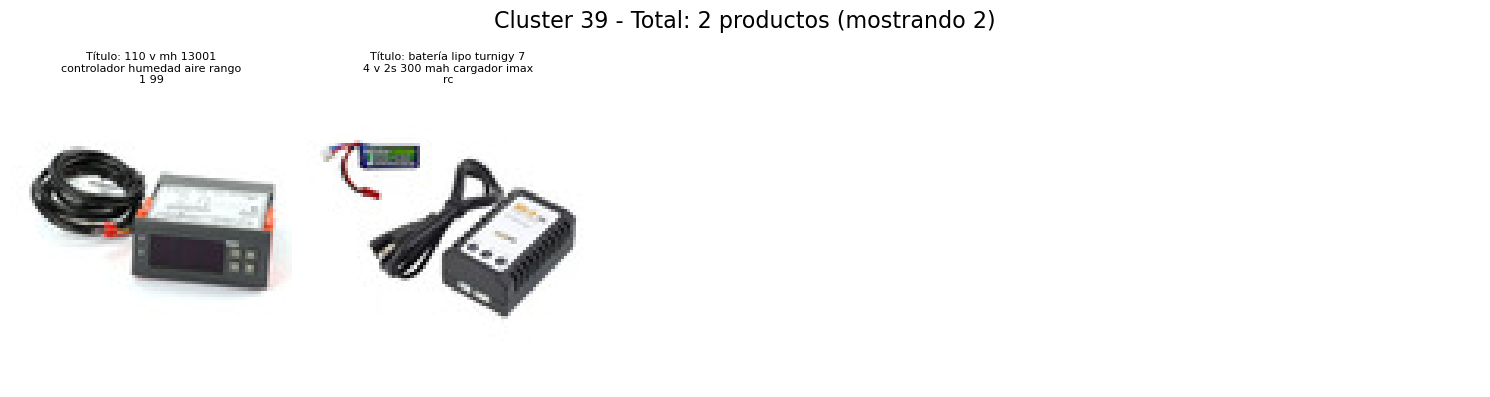


Cluster 38 - Mostrando 2 de 2 productos:


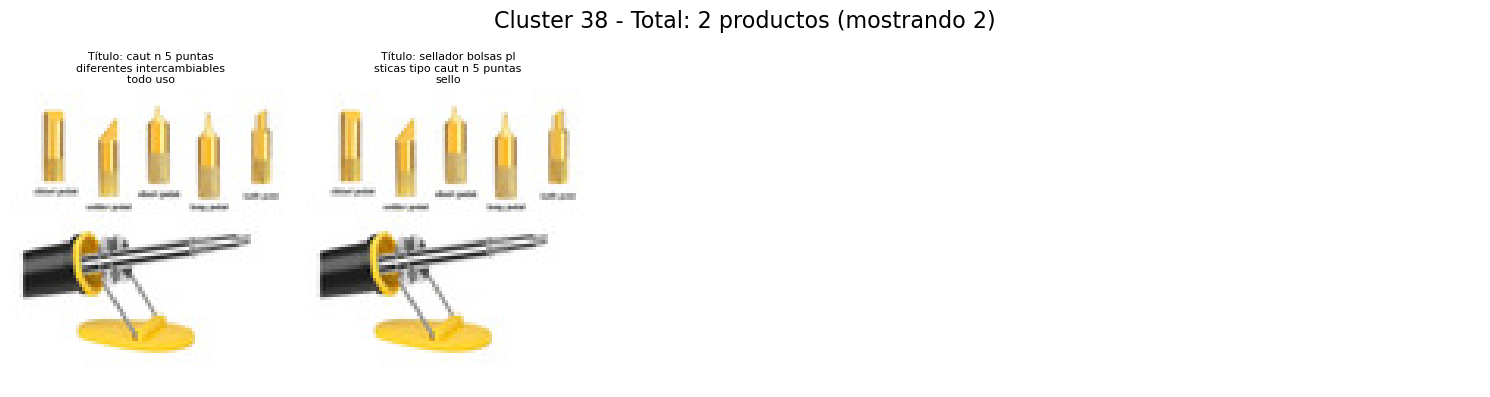


Cluster 42 - Mostrando 2 de 2 productos:


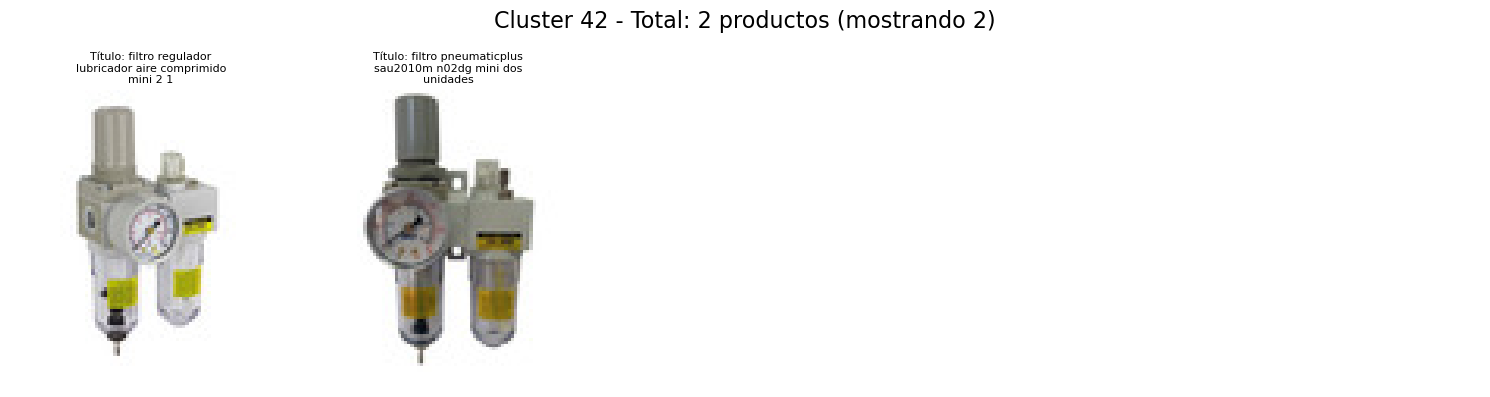


Cluster 46 - Mostrando 2 de 2 productos:


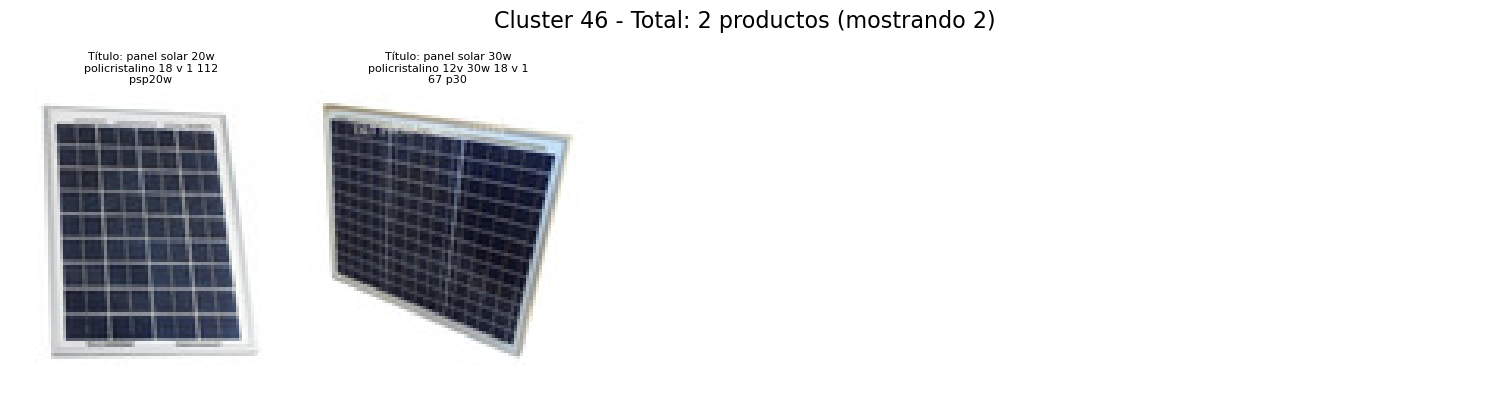


Cluster 47 - Mostrando 2 de 2 productos:


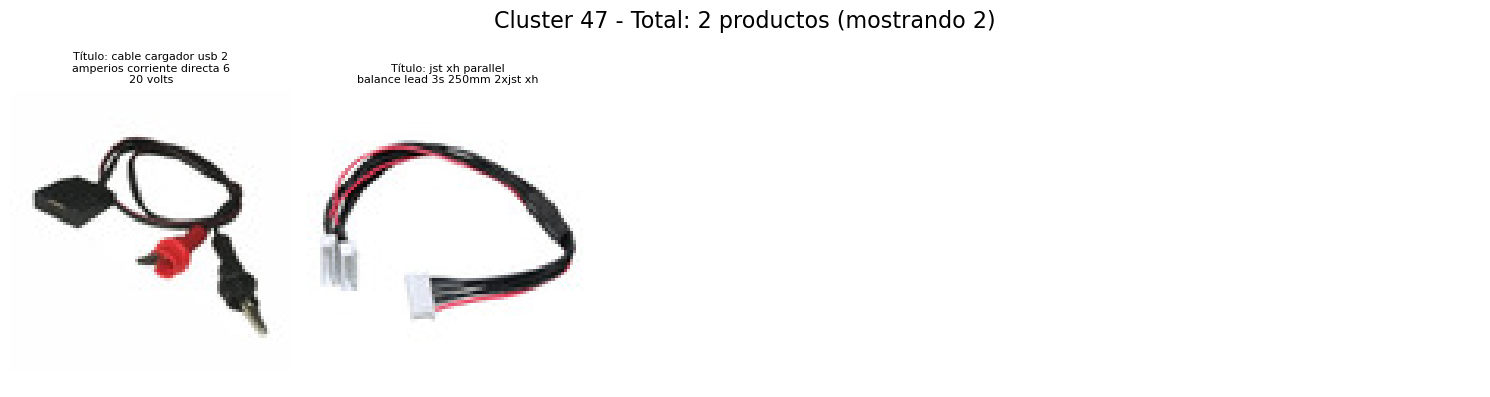


Cluster 48 - Mostrando 2 de 2 productos:


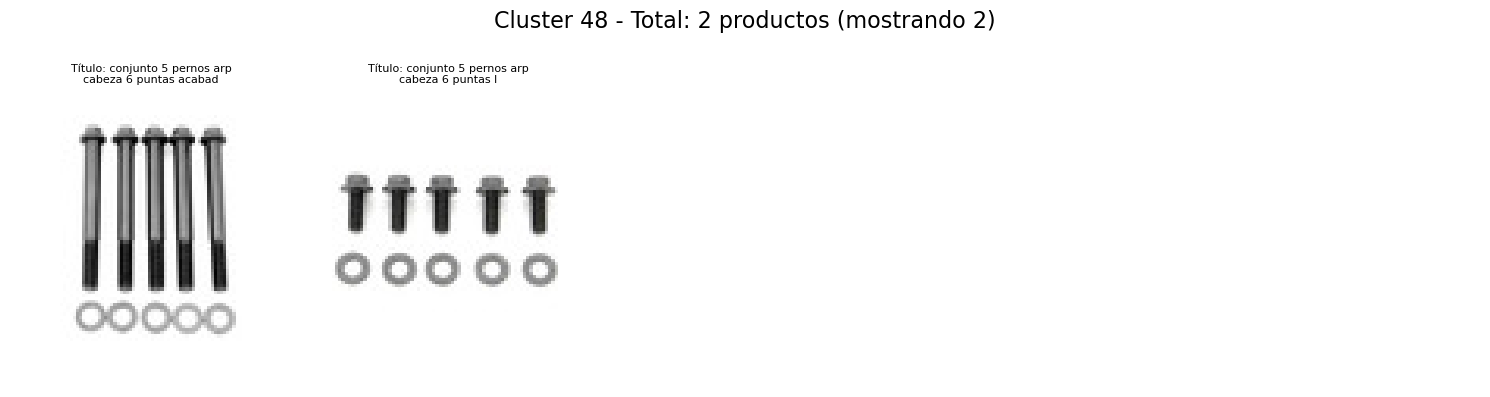


Cluster 45 - Mostrando 2 de 2 productos:


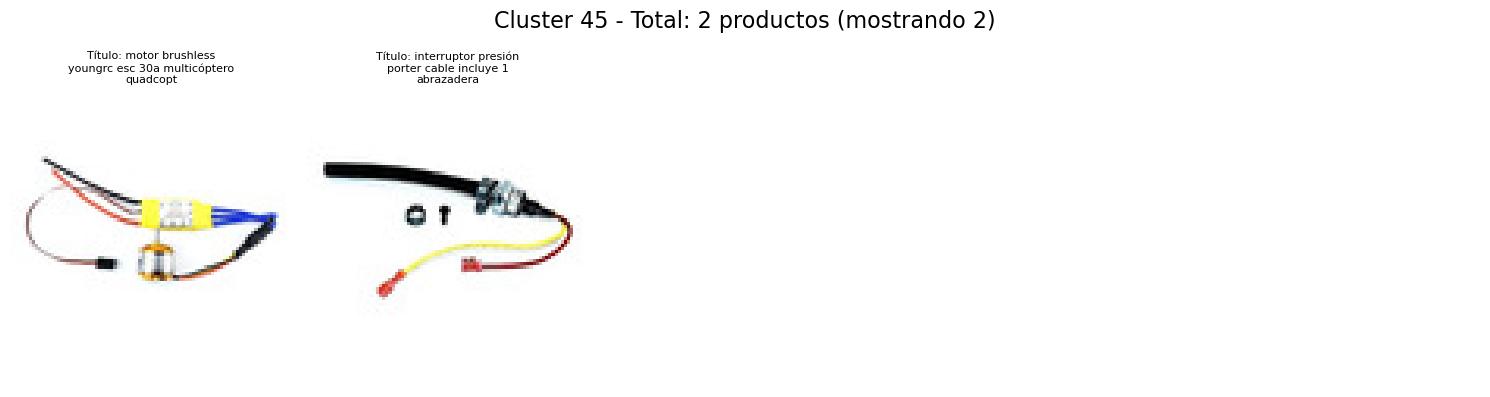


Cluster 49 - Mostrando 2 de 2 productos:


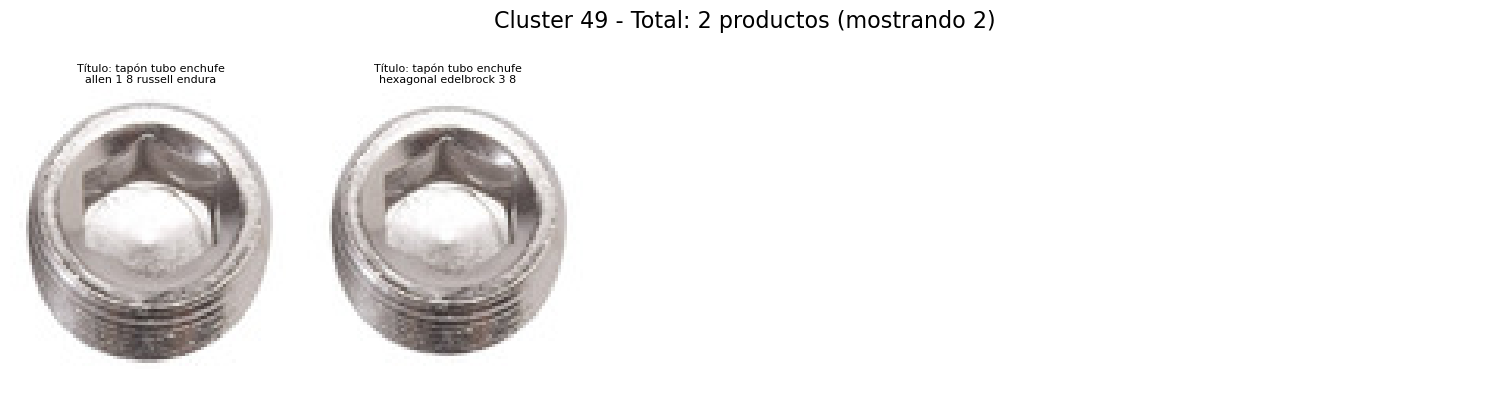


Cluster 50 - Mostrando 2 de 2 productos:


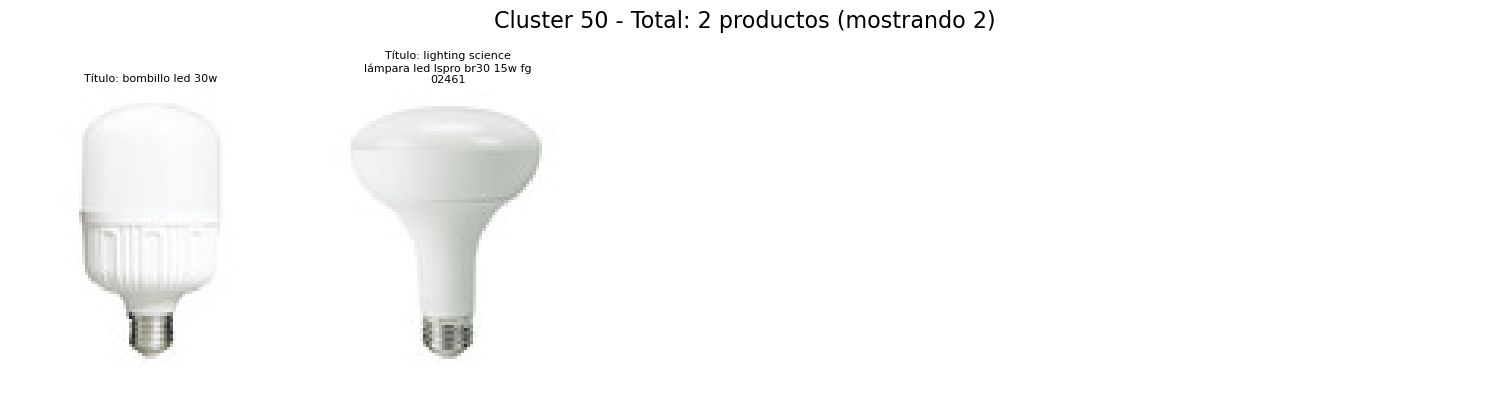


Cluster 52 - Mostrando 2 de 2 productos:


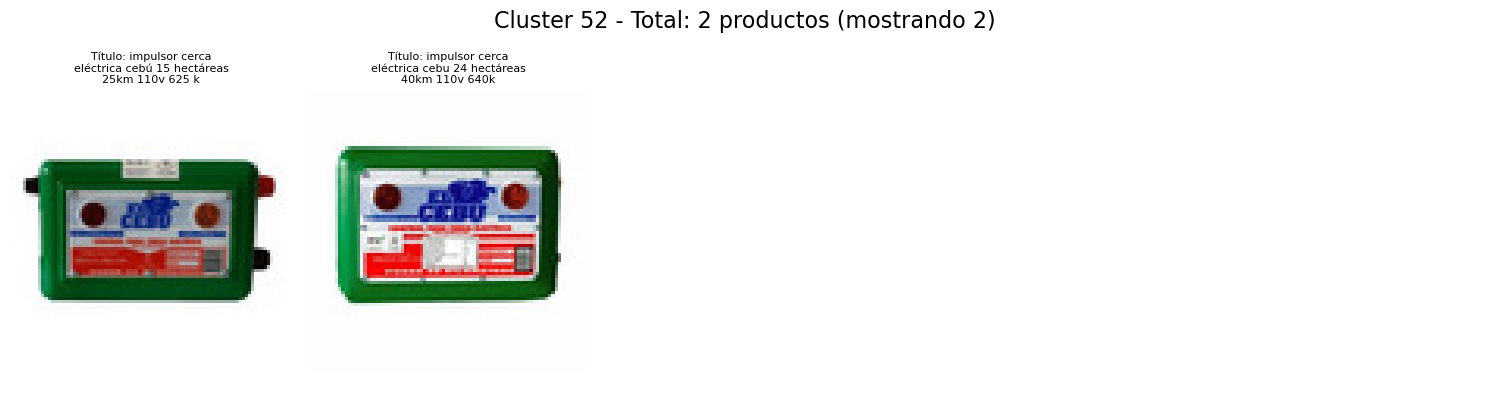


Cluster 51 - Mostrando 2 de 2 productos:


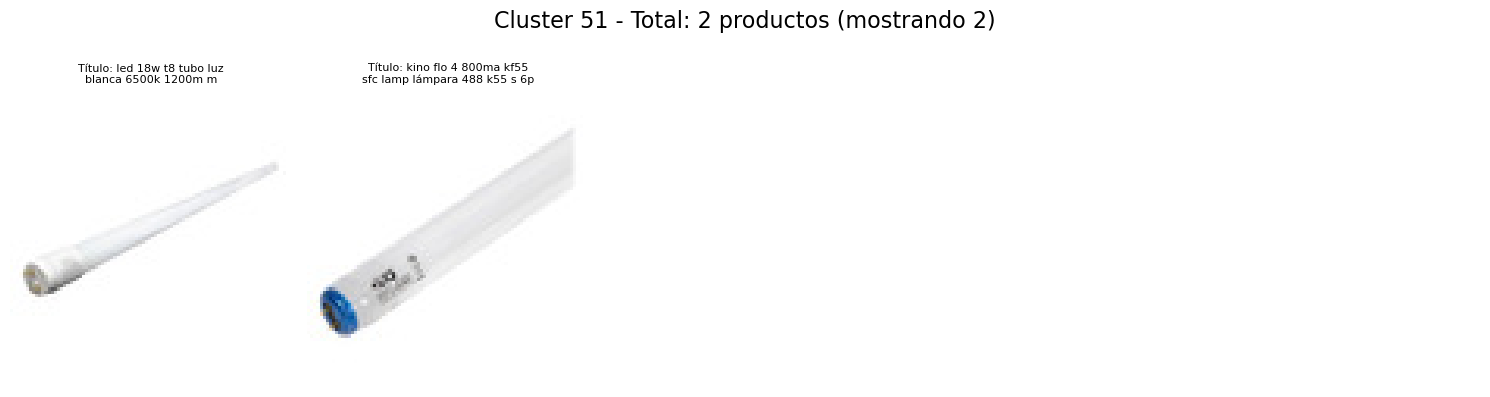


Cluster 53 - Mostrando 2 de 2 productos:


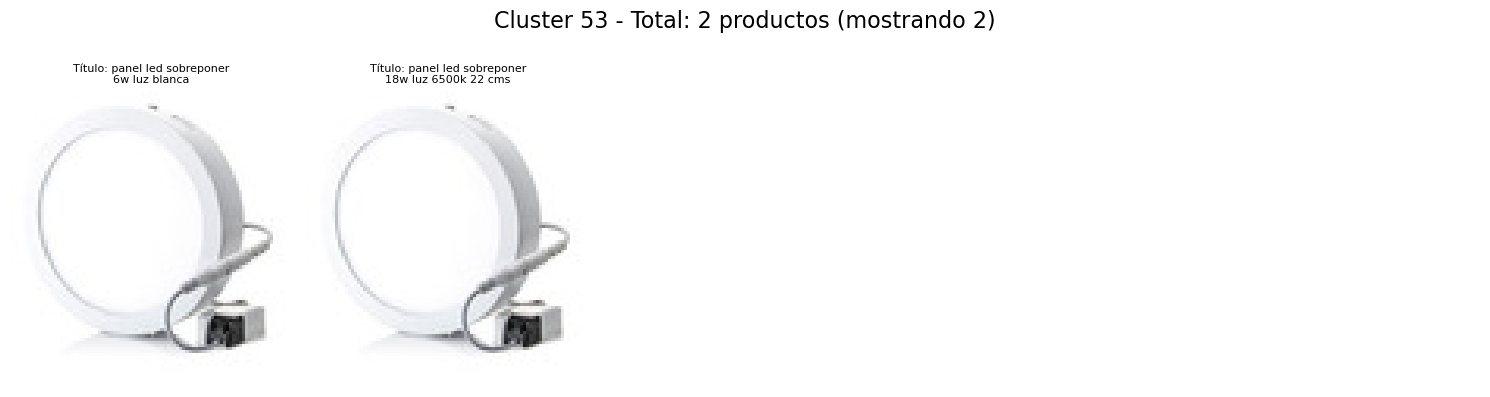


Cluster 54 - Mostrando 2 de 2 productos:


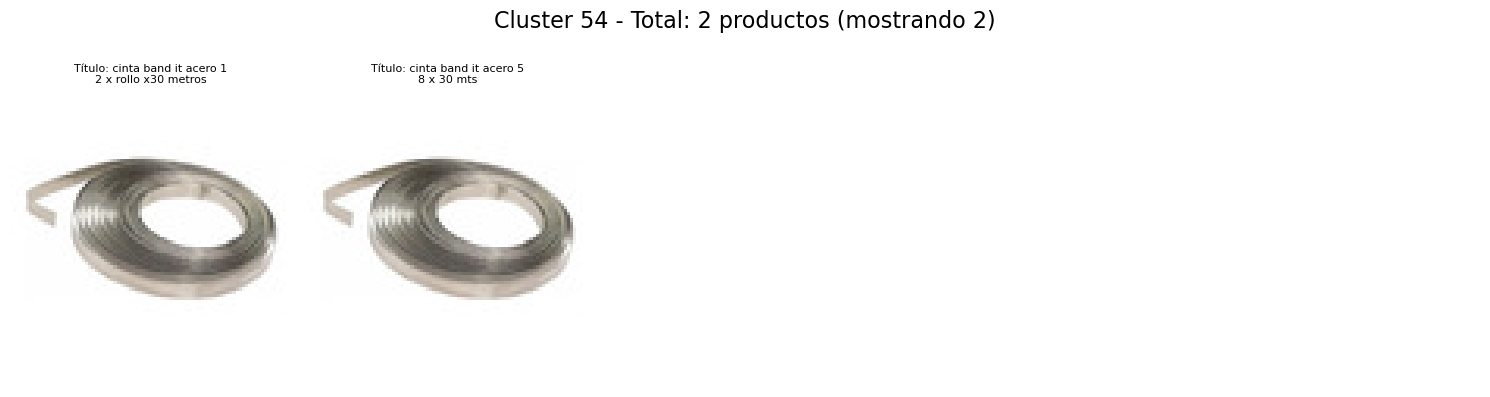


Cluster 56 - Mostrando 2 de 2 productos:


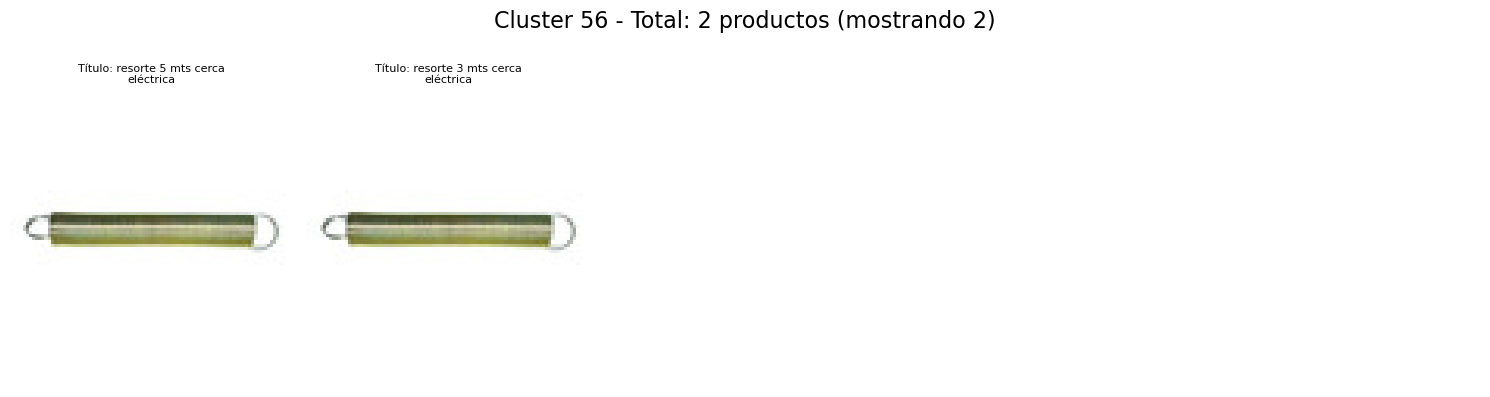


Cluster 57 - Mostrando 2 de 2 productos:


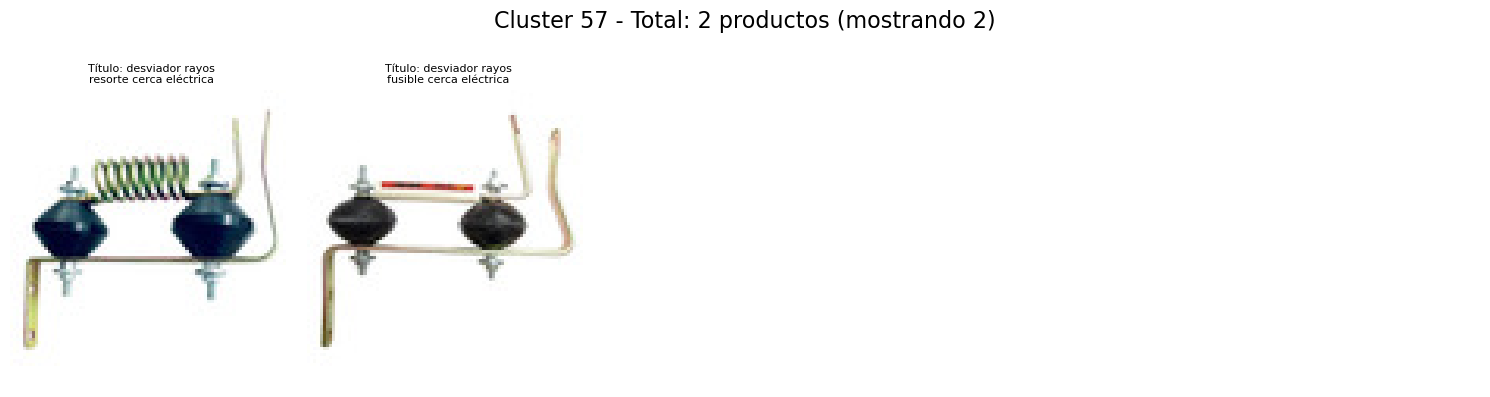

In [171]:

import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from textwrap import wrap

# Obtener los 10 clusters más grandes
cluster_counts = df_merged['new_cluster'].value_counts().head(60)
print("60 Clusters con más productos:")
print(cluster_counts)

# Configuración de la figura para subplots
for cluster_id in cluster_counts.index:
    cluster_data = df_merged[df_merged['new_cluster'] == cluster_id]
    num_products = min(len(cluster_data), 35)  # Limitar a 15 productos máximo
    print(f"\nCluster {cluster_id} - Mostrando {num_products} de {len(cluster_data)} productos:")

    # Determinar el número de filas y columnas dinámicamente
    num_cols = 5  # Máximo 5 columnas
    num_rows = (num_products + num_cols - 1) // num_cols  # Calcular filas necesarias
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 4))
    fig.suptitle(f"Cluster {cluster_id} - Total: {len(cluster_data)} productos (mostrando {num_products})", fontsize=16)

    # Aplanar los ejes para iterar fácilmente
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    # Mostrar imágenes y títulos de los productos
    for idx, (index, row) in enumerate(cluster_data.head(num_products).iterrows()):
        try:
            # Descargar y cargar la imagen
            response = requests.get(row['thumbnail'], timeout=10)
            response.raise_for_status()
            image = Image.open(BytesIO(response.content))

            # Mostrar la imagen en el subplot
            axes[idx].imshow(image)
            axes[idx].axis('off')
            # Título del producto, limitado a dos líneas
            title = "\n".join(wrap(f"Título: {row['title_std']}", width=30))
            axes[idx].set_title(title, fontsize=8, wrap=True)
        except Exception as e:
            axes[idx].axis('off')
            axes[idx].set_title("Imagen no disponible", fontsize=8)
        
    # Ocultar subplots sobrantes si hay menos productos que subplots
    for ax in axes[num_products:]:
        ax.axis('off')

    # Ajustar diseño del subplot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar espacio para el título
    plt.show()



### **Explicación del Proceso de Clustering y Justificación del Modelo Final**

---

### **Fase 1: Clustering Inicial Basado en el Título del Producto**
En la primera etapa, se realizó un clustering basado únicamente en los **títulos de los productos** utilizando los embeddings generados con OpenAI. Esta decisión se tomó porque los títulos de los productos contienen información descriptiva clave que ayuda a agrupar productos similares.

1. **Modelo Utilizado**:
   - DBSCAN se empleó para identificar grupos naturales de productos similares, optimizando los parámetros `eps` y `min_samples`.

2. **Resultados del Clustering Inicial**:
   - **Número de clusters formados**: Variado según los parámetros.
   - **Noise Ratio**: Elevado, ya que una parte considerable de los productos no se agrupó en clusters debido a su naturaleza única o falta de información suficiente en los títulos.

3. **Limitación Identificada**:
   - Los productos etiquetados como `-1` (ruido) no pudieron ser agrupados adecuadamente debido a la falta de información contextual adicional, como imágenes, precios o marcas.

---

### **Fase 2: Agrupación de Outliers con Características Adicionales**
Para abordar las limitaciones del clustering inicial, se diseñó una estrategia para procesar los **outliers (`-1`)** identificados previamente. En esta segunda etapa:
1. **Características Adicionales Utilizadas**:
   - **Imágenes de los productos** (procesadas con CLIP) para capturar similitudes visuales.
   - **Precios** normalizados, para identificar productos dentro de rangos económicos similares.
   - **Marcas**, como un indicador importante en ciertos segmentos.
   - **GTIN**, si estaba disponible, para agregar una capa de información categórica.

2. **Modelo Utilizado**:
   - Nuevamente, se empleó DBSCAN con un enfoque optimizado para capturar la densidad en un espacio de características más rico.
   - Se realizaron pruebas de varias combinaciones de características para evaluar su impacto en los clusters y métricas.

3. **Resultados del Clustering de Outliers**:
   - Los productos etiquetados como ruido en el primer clustering ahora se agruparon en clusters más pequeños pero relevantes.
   - Se analizaron las métricas obtenidas para seleccionar la mejor configuración.

---

### **Justificación del Modelo Final**
El modelo final elegido (fila **19**) representa la combinación más sólida de características y parámetros para agrupar tanto los productos originales como los outliers, basándose en las siguientes métricas:

1. **Silhouette Score**: `0.6580`
   - Un puntaje que indica una buena separación entre los clusters formados, especialmente considerando la complejidad de los datos.

2. **Davies-Bouldin Score**: `0.7197`
   - Este puntaje refleja clusters compactos y razonablemente separados, lo que confirma la calidad del agrupamiento.

3. **Noise Ratio**: `0.7980`
   - Aunque un ruido cercano al 80% es elevado, fue tolerado debido a la naturaleza dispersa de los datos y la dificultad de agrupar ciertos productos únicos.





---

### **Impacto del Modelo en el Problema**
- **Productos Iniciales**: Agrupados de manera efectiva según la similitud de sus títulos.
- **Outliers**: Ahora forman clusters útiles basados en similitudes visuales, precios y marcas, lo que permite identificar productos únicos o difíciles de clasificar en la primera etapa.

---

### **Conclusión y Próximos Pasos**
El modelo seleccionado logra:
1. Maximizar la calidad de los clusters formados (con un Silhouette Score alto).
2. Reducir el número de productos no agrupados al incluir información adicional (imágenes, precios, etc.).
3. Proveer una base sólida para análisis posteriores, como personalización de resultados o recomendaciones.
